In [1]:
import os
import sys
import pandas as pd

sys.path.append('/home/fboehning/fboehning')

import logging
logging.basicConfig(
    level=logging.INFO,
    #level=logging.DEBUG,
    format='%(asctime)s - %(filename)s - %(name)s - %(funcName)s - %(levelname)s - %(message)s')

In [2]:
TOOLKIT=[
    'beesup_llm.toolkit.llm_utils',
    'beesup_llm.toolkit.dict_utils',
    'beesup_llm.toolkit.setup_utils',
    'beesup_llm.toolkit.visualization',
    'beesup_llm.toolkit.display_settings',
]

DATASET=[
    'beesup_llm.dataset',
]

MODEL_PIPELINES=[
    'beesup_llm.model_pipelines'
]

INJECTION=[
    'beesup_llm.injection',
    'beesup_llm.injection.taxomizing_pipeline',
    'beesup_llm.injection.taxomizing_utils',
]

# EXTRACTION=[
#     'beesup_llm.extraction',
#     'beesup_llm.extraction.extraction_pipeline',
#     'beesup_llm.extraction.extraction_utils',
#     'beesup_llm.extraction.evaluation_pipeline',
#     'beesup_llm.extraction.evaluation_utils',
# ]

# EXPERIMENT=[
#     'beesup_llm.experiment',
#     'beesup_llm.experiment.extraction_experiment'
# ]


import importlib
import beesup_llm;
import beesup_llm.toolkit.llm_utils; from beesup_llm.toolkit.llm_utils import *
import beesup_llm.toolkit.dict_utils; from beesup_llm.toolkit.dict_utils import *
import beesup_llm.toolkit.setup_utils; from beesup_llm.toolkit.setup_utils import *
import beesup_llm.toolkit.visualization; from beesup_llm.toolkit.visualization import *
import beesup_llm.toolkit.display_settings; from beesup_llm.toolkit.display_settings import *

import beesup_llm.dataset; from beesup_llm.dataset import *
import beesup_llm.training; from beesup_llm.training import *
import beesup_llm.model_pipelines; from beesup_llm.model_pipelines import *

# import beesup_llm.extraction; from beesup_llm.extraction import *
# import beesup_llm.extraction.extraction_utils; from beesup_llm.extraction.extraction_utils import *
# import beesup_llm.extraction.extraction_pipeline; from beesup_llm.extraction.extraction_pipeline import *

# import beesup_llm.extraction.evaluation_utils; from beesup_llm.extraction.evaluation_utils import *
# import beesup_llm.extraction.evaluation_pipeline; from beesup_llm.extraction.evaluation_pipeline import *

# import beesup_llm.experiment; from beesup_llm.experiment import *
# import beesup_llm.experiment.extraction_experiment; from beesup_llm.experiment.extraction_experiment import *

import beesup_llm.injection; from beesup_llm.injection import *
import beesup_llm.injection.taxomizing_utils; from beesup_llm.injection.taxomizing_utils import *
import beesup_llm.injection.taxomizing_pipeline; from beesup_llm.injection.taxomizing_pipeline import *


def reimport(pathlist=TOOLKIT+DATASET+MODEL_PIPELINES+INJECTION):

    pathlist = ['beesup_llm'] + pathlist

    for module_path in pathlist:
        if module_path in sys.modules:
            # Reload if the module is already imported
            importlib.reload(sys.modules[module_path])
        else:

            importlib.import_module(module_path)
            # Import the module or submodule for the first time
            globals()[module_path.split('.')[0]] = importlib.import_module(module_path)

        module = sys.modules[module_path]
        globals().update({name: getattr(module, name) for name in dir(module) if not name.startswith('_')})

import logging
def set_info():
    logger = logging.getLogger('beesup_llm')
    logger.setLevel(logging.INFO)
    logging.getLogger().setLevel(logging.INFO)

def set_debug():
    logger = logging.getLogger('beesup_llm')
    logger.setLevel(logging.DEBUG)
    logging.getLogger().setLevel(logging.DEBUG)

set_info()
reimport()

2025-01-31 08:06:50,584 - config.py - datasets - <module> - INFO - PyTorch version 2.3.1 available.


# Test Embedding Models

In [3]:
!nvidia-smi

Tue Jan 28 09:17:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.127.05             Driver Version: 550.127.05     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A40                     Off |   00000000:D2:00.0 Off |                    0 |
|  0%   29C    P8             32W /  300W |       4MiB /  46068MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [27]:
modelwrap=NvidiaModelWrap(
    encode_config=dict(
        instruction="Instruct: Retrieve the a suitable header for the chunk.\nChunk: "
        )
    )
modelwrap.get_config()

2024-11-26 14:42:50,452 - __init__.py - beesup_llm - __init__ - INFO - 0005_EMB_MODEL initialised


{'type': 'emb_model',
 'id': 5,
 'name': '0005_emb_model',
 'path': '/home/fboehning/fboehning/cluster_lab/emb_models/0005_emb_model',
 'parent_dir_path': '/home/fboehning/fboehning/cluster_lab/emb_models',
 'parent_lab_path': '/home/fboehning/fboehning/cluster_lab',
 'name_or_path': 'nvidia/NV-Embed-v2',
 'encode_config': {'instruction': 'Instruct: Retrieve the a suitable header for the chunk.\nChunk: ',
  'max_length': 32768},
 'timestamp_init': '2024-11-26_15-42-50',
 'bnb_config': {'load_in_4bit': True,
  'bnb_4bit_use_double_quant': True,
  'bnb_4bit_quant_type': 'nf4'},
 'model_load_config': {'trust_remote_code': True}}

In [19]:
modelwrap=JinaaiModelWrap(task='text-matching')
modelwrap.get_config()

2024-11-26 14:34:46,540 - __init__.py - beesup_llm - __init__ - INFO - 0005_EMB_MODEL initialised


{'type': 'emb_model',
 'id': 5,
 'name': '0005_emb_model',
 'path': '/home/fboehning/fboehning/cluster_lab/emb_models/0005_emb_model',
 'parent_dir_path': '/home/fboehning/fboehning/cluster_lab/emb_models',
 'parent_lab_path': '/home/fboehning/fboehning/cluster_lab',
 'name_or_path': 'jinaai/jina-embeddings-v3',
 'task': 'text-matching',
 'timestamp_init': '2024-11-26_15-34-46',
 'bnb_config': {'load_in_4bit': True,
  'bnb_4bit_use_double_quant': True,
  'bnb_4bit_quant_type': 'nf4'},
 'model_load_config': {'trust_remote_code': True,
  'device_map': 'auto',
  'use_flash_attn': False,
  'task': 'separation'},
 'encode_config': {}}

# Generate Knowledge Dataset

In [5]:
import re
import sqlite3
import spacy

nlp=spacy.load('de_core_news_sm')

def count_words(text):
    text=re.sub(r'[(),-;]','',text) #normaly parentheses, commas and hyphens are counted as words --> remove them
    doc=nlp(text)
    return len(doc)

In [6]:
conn = sqlite3.connect('wildbienen_db.db')
query = """
WITH InfoQuery AS (
    -- First query (retrieving scientific names and associated attrs)
    SELECT
        t.name AS genus_species,
        ta.name AS author_year,
        it.name AS attr_key,
        i.value AS attr_val,
		s.name AS source_name,
		--s.base_url AS source_url,
		--i.source_other,
		it.type AS attr_type
		
	FROM information i	
    JOIN taxa t ON i.taxon_id = t.id
    JOIN info_types it ON i.type_id = it.id
    JOIN taxon_authors ta ON t.author_id = ta.id
    LEFT JOIN sources s ON i.source_id = s.id
	WHERE attr_key NOT IN (
		'Literatur', 'Literatur und Quellen', 'Quellen', 'Siehe auch', 'Belege', 
		'Weblinks', 'Weblink', 'Webseite', 'Einzelnachweise', 
		'Rote Liste BW:', 'Rote Liste D:',
		'Bilder', 'Bildergalerie',
		'Videos', 'Videoclips'
		)
		--AND genus_species in ('Andrena nitida', 'Andrena flavipes', 'Andrena nitidiuscula')
),

VernacularNames AS (
    -- Second query (retrieving vernacular names for German and English where the scientific name matches InfoQuery)
    SELECT
        t.name AS genus_species,
        ta.name AS author_year,
        'Deutscher Name:' AS attr_key,
        tv.name AS attr_val,
        'wildbienen-kataster' AS source_name,           
		'Attribute' AS attr_type

		
    FROM taxa t
    JOIN taxon_vernacularnames tv ON t.id = tv.taxon_id
    JOIN taxon_authors ta ON t.author_id = ta.id
    WHERE tv.language_code = 'de'
    AND t.name IN (SELECT genus_species FROM InfoQuery)

)

-- Final query to combine InfoQuery and VernacularNames
SELECT * FROM InfoQuery

UNION

SELECT * FROM VernacularNames

ORDER BY genus_species, attr_key, attr_val;

"""

query_df = pd.read_sql_query(query, conn)
conn.close()


query_df['attr_key']=query_df['attr_key'].apply(lambda x: re.sub(r': *$', '', x))
query_df['attr_val']=query_df['attr_val'].apply(lambda x: x.strip())

query_df['author_year']=query_df['author_year'].apply(lambda x: re.sub(r'[()]', '', x))
query_df['attr_val']=query_df.apply(lambda x: f'{x.genus_species} ({x.author_year})' if x.attr_key=='Wissenschaftlicher Name' else x.attr_val, axis=1)

query_df.replace('', np.nan, inplace=True)
query_df.dropna(inplace=True)

query_df.loc[query_df.attr_key=='Deutscher Name','attr_key']='Umgangssprachliche Bezeichnungen'
query_df.loc[query_df.attr_key=='Kuckucksbiene','attr_key']='Kuckucksbienen'
query_df.loc[query_df.attr_key=='Kuckuckswespe','attr_key']='Kuckuckswespen'
query_df.loc[query_df.attr_key=='Wirtsbiene','attr_key']='Wirtsbienen'

query_df=query_df[query_df.attr_val!='']
#query_df['n_tokns']=query_df['attr_val'].apply(lambda x: len(tokenizer.encode(x)))

query_df

genus_species     author_year                          attr_key  \
0     Aglaoapis tridentata  Nylander, 1848                          Aussehen   
1     Aglaoapis tridentata  Nylander, 1848  Umgangssprachliche Bezeichnungen   
2     Aglaoapis tridentata  Nylander, 1848  Umgangssprachliche Bezeichnungen   
3     Aglaoapis tridentata  Nylander, 1848                           Familie   
4     Aglaoapis tridentata  Nylander, 1848                  Kurzbeschreibung   
...                    ...             ...                               ...   
4301     Xylocopa violacea  Linnaeus, 1758                         Nistweise   
4302     Xylocopa violacea  Linnaeus, 1758             Pollensammelverhalten   
4303     Xylocopa violacea  Linnaeus, 1758                        Requisiten   
4304     Xylocopa violacea  Linnaeus, 1758                         Vorkommen   
4305     Xylocopa violacea  Linnaeus, 1758           Wissenschaftlicher Name   

                                               attr_val          source_name  \
0     Die Biene ist schwarz, etwa 8–10 mm lang und m...            wikipedia   
1                                  Dunkle Zweizahnbiene  wildbienen-kataster   
2                                         Zweizahnbiene  wildbienen-kataster   
3                                          Megachilidae  wildbienen-kataster   
4     Dunkle Zweizahnbiene (Aglaoapis tridentata, Sy...            wikipedia   
...                                                 ...                  ...   
4301              hypergäisch-selbstgegrabene Hohlräume  wildbienen-kataster   
4302                                       polylektisch  wildbienen-kataster   
4303                                            Totholz  wildbienen-kataster   
4304  Die Art kommt in Süd- und Mitteleuropa bis in ...            wikipedia   
4305                 Xylocopa violacea (Linnaeus, 1758)  wildbienen-kataster   

      attr_type  
0          Text  
1     Attribute  
2     Attribute  
3     Attribute  
4          Text  
...         ...  
4301  Attribute  
4302  Attribute  
4303  Attribute  
4304       Text  
4305  Attribute  

[4294 rows x 6 columns]

In [7]:
knowledge_df=query_df.groupby(by=['genus_species','author_year','attr_key']).agg({
    'attr_val': lambda x: '; '.join(x),
    'source_name': lambda x: x.iloc[0],
    'attr_type': lambda x: x.iloc[0],
    #'n_tokns':'sum',

}).reset_index()

knowledge_df['n_units']=query_df.groupby(by=['genus_species','author_year','attr_key']).size().values
knowledge_df['n_words']=knowledge_df['attr_val'].apply(count_words)

knowledge_df['scientific_name']=knowledge_df['genus_species']+' ('+knowledge_df['author_year']+')'

knowledge_df

genus_species     author_year                          attr_key  \
0     Aglaoapis tridentata  Nylander, 1848                          Aussehen   
1     Aglaoapis tridentata  Nylander, 1848                           Familie   
2     Aglaoapis tridentata  Nylander, 1848                  Kurzbeschreibung   
3     Aglaoapis tridentata  Nylander, 1848                        Lebensraum   
4     Aglaoapis tridentata  Nylander, 1848                   Sozialverhalten   
...                    ...             ...                               ...   
3884     Xylocopa violacea  Linnaeus, 1758             Pollensammelverhalten   
3885     Xylocopa violacea  Linnaeus, 1758                        Requisiten   
3886     Xylocopa violacea  Linnaeus, 1758  Umgangssprachliche Bezeichnungen   
3887     Xylocopa violacea  Linnaeus, 1758                         Vorkommen   
3888     Xylocopa violacea  Linnaeus, 1758           Wissenschaftlicher Name   

                                               attr_val          source_name  \
0     Die Biene ist schwarz, etwa 8–10 mm lang und m...            wikipedia   
1                                          Megachilidae  wildbienen-kataster   
2     Dunkle Zweizahnbiene (Aglaoapis tridentata, Sy...            wikipedia   
3     Die Biene lebt auf trockenen, blütenreichen Bö...            wikipedia   
4                                           parasitisch  wildbienen-kataster   
...                                                 ...                  ...   
3884                                       polylektisch  wildbienen-kataster   
3885                                            Totholz  wildbienen-kataster   
3886            Blauschwarze Holzbiene; Große Holzbiene  wildbienen-kataster   
3887  Die Art kommt in Süd- und Mitteleuropa bis in ...            wikipedia   
3888                 Xylocopa violacea (Linnaeus, 1758)  wildbienen-kataster   

      attr_type  n_units  n_words                        scientific_name  
0          Text        1       33  Aglaoapis tridentata (Nylander, 1848)  
1     Attribute        1        1  Aglaoapis tridentata (Nylander, 1848)  
2          Text        1       23  Aglaoapis tridentata (Nylander, 1848)  
3          Text        1       38  Aglaoapis tridentata (Nylander, 1848)  
4     Attribute        1        1  Aglaoapis tridentata (Nylander, 1848)  
...         ...      ...      ...                                    ...  
3884  Attribute        1        1     Xylocopa violacea (Linnaeus, 1758)  
3885  Attribute        1        1     Xylocopa violacea (Linnaeus, 1758)  
3886  Attribute        2        4     Xylocopa violacea (Linnaeus, 1758)  
3887       Text        1      162     Xylocopa violacea (Linnaeus, 1758)  
3888  Attribute        1        3     Xylocopa violacea (Linnaeus, 1758)  

[3889 rows x 9 columns]

In [21]:
knowledge_df.drop(columns=['prompt','gold_completion','prompt_messages','gold_message'],inplace=True)

In [22]:
knowledge_ds=BaseDataset()
knowledge_ds.get_config()

2024-11-06 07:37:37,059 - __init__.py - beesup_llm - __init__ - INFO - 0001_DATASET initialised


{'type': 'dataset',
 'id': 1,
 'name': '0001_dataset',
 'path': '/home/fboehning/fboehning/cluster_lab/datasets/0001_dataset',
 'parent_dir_path': '/home/fboehning/fboehning/cluster_lab/datasets',
 'parent_lab_path': '/home/fboehning/fboehning/cluster_lab',
 'datetime_init': datetime.datetime(2024, 11, 6, 8, 37, 37, 58916, tzinfo=<DstTzInfo 'Europe/Berlin' CET+1:00:00 STD>)}

In [23]:
ds_config=dict(
    remarks = 'basic knowledge_df from wildbienen_db, no embeddings',
)
knowledge_ds.dataset_df=knowledge_df
knowledge_ds.update_attributes(ds_config)
knowledge_ds.get_config()

{'type': 'dataset',
 'id': 1,
 'name': '0001_dataset',
 'path': '/home/fboehning/fboehning/cluster_lab/datasets/0001_dataset',
 'parent_dir_path': '/home/fboehning/fboehning/cluster_lab/datasets',
 'parent_lab_path': '/home/fboehning/fboehning/cluster_lab',
 'datetime_init': datetime.datetime(2024, 11, 6, 8, 37, 37, 58916, tzinfo=<DstTzInfo 'Europe/Berlin' CET+1:00:00 STD>),
 'remarks': 'basic knowledge_df from wildbienen_db, no embeddings'}

In [24]:
knowledge_ds.dataset_df

genus_species     author_year                          attr_key  \
0     Aglaoapis tridentata  Nylander, 1848                          Aussehen   
1     Aglaoapis tridentata  Nylander, 1848                           Familie   
2     Aglaoapis tridentata  Nylander, 1848                  Kurzbeschreibung   
3     Aglaoapis tridentata  Nylander, 1848                        Lebensraum   
4     Aglaoapis tridentata  Nylander, 1848                   Sozialverhalten   
...                    ...             ...                               ...   
3884     Xylocopa violacea  Linnaeus, 1758             Pollensammelverhalten   
3885     Xylocopa violacea  Linnaeus, 1758                        Requisiten   
3886     Xylocopa violacea  Linnaeus, 1758  Umgangssprachliche Bezeichnungen   
3887     Xylocopa violacea  Linnaeus, 1758                         Vorkommen   
3888     Xylocopa violacea  Linnaeus, 1758           Wissenschaftlicher Name   

                                               attr_val          source_name  \
0     Die Biene ist schwarz, etwa 8–10 mm lang und m...            wikipedia   
1                                          Megachilidae  wildbienen-kataster   
2     Dunkle Zweizahnbiene (Aglaoapis tridentata, Sy...            wikipedia   
3     Die Biene lebt auf trockenen, blütenreichen Bö...            wikipedia   
4                                           parasitisch  wildbienen-kataster   
...                                                 ...                  ...   
3884                                       polylektisch  wildbienen-kataster   
3885                                            Totholz  wildbienen-kataster   
3886            Blauschwarze Holzbiene; Große Holzbiene  wildbienen-kataster   
3887  Die Art kommt in Süd- und Mitteleuropa bis in ...            wikipedia   
3888                 Xylocopa violacea (Linnaeus, 1758)  wildbienen-kataster   

      attr_type  n_units  n_words                        scientific_name  
0          Text        1       33  Aglaoapis tridentata (Nylander, 1848)  
1     Attribute        1        1  Aglaoapis tridentata (Nylander, 1848)  
2          Text        1       23  Aglaoapis tridentata (Nylander, 1848)  
3          Text        1       38  Aglaoapis tridentata (Nylander, 1848)  
4     Attribute        1        1  Aglaoapis tridentata (Nylander, 1848)  
...         ...      ...      ...                                    ...  
3884  Attribute        1        1     Xylocopa violacea (Linnaeus, 1758)  
3885  Attribute        1        1     Xylocopa violacea (Linnaeus, 1758)  
3886  Attribute        2        4     Xylocopa violacea (Linnaeus, 1758)  
3887       Text        1      162     Xylocopa violacea (Linnaeus, 1758)  
3888  Attribute        1        3     Xylocopa violacea (Linnaeus, 1758)  

[3889 rows x 9 columns]

In [25]:
knowledge_ds.spawn()

2024-11-06 07:38:08,249 - __init__.py - root - spawn - INFO - 0001_DATASET spawned at /home/fboehning/fboehning/cluster_lab/datasets/0001_dataset


# Generate Embedding Dataset

In [3]:
knowledge_ds = BaseDataset(1)
knowledge_df=knowledge_ds.dataset_df
knowledge_df

knowledge_df=knowledge_ds.dataset_df.copy()
knowledge_df=knowledge_df.drop(columns=['genus_species','author_year'])
knowledge_df=knowledge_df.rename(columns={
    'scientific_name':'s',
    'attr_key':'p',
    'attr_val':'o',
})
col_order=['s','p','o','source_name','attr_type','n_units','n_words']
knowledge_df=knowledge_df[col_order]

knowledge_df

2024-11-26 15:19:24,908 - __init__.py - beesup_llm - __init__ - INFO - 0001_DATASET initialised


s                                 p  \
0     Aglaoapis tridentata (Nylander, 1848)                          Aussehen   
1     Aglaoapis tridentata (Nylander, 1848)                           Familie   
2     Aglaoapis tridentata (Nylander, 1848)                  Kurzbeschreibung   
3     Aglaoapis tridentata (Nylander, 1848)                        Lebensraum   
4     Aglaoapis tridentata (Nylander, 1848)                   Sozialverhalten   
...                                     ...                               ...   
3884     Xylocopa violacea (Linnaeus, 1758)             Pollensammelverhalten   
3885     Xylocopa violacea (Linnaeus, 1758)                        Requisiten   
3886     Xylocopa violacea (Linnaeus, 1758)  Umgangssprachliche Bezeichnungen   
3887     Xylocopa violacea (Linnaeus, 1758)                         Vorkommen   
3888     Xylocopa violacea (Linnaeus, 1758)           Wissenschaftlicher Name   

                                                      o          source_name  \
0     Die Biene ist schwarz, etwa 8–10 mm lang und m...            wikipedia   
1                                          Megachilidae  wildbienen-kataster   
2     Dunkle Zweizahnbiene (Aglaoapis tridentata, Sy...            wikipedia   
3     Die Biene lebt auf trockenen, blütenreichen Bö...            wikipedia   
4                                           parasitisch  wildbienen-kataster   
...                                                 ...                  ...   
3884                                       polylektisch  wildbienen-kataster   
3885                                            Totholz  wildbienen-kataster   
3886            Blauschwarze Holzbiene; Große Holzbiene  wildbienen-kataster   
3887  Die Art kommt in Süd- und Mitteleuropa bis in ...            wikipedia   
3888                 Xylocopa violacea (Linnaeus, 1758)  wildbienen-kataster   

      attr_type  n_units  n_words  
0          Text        1       33  
1     Attribute        1        1  
2          Text        1       23  
3          Text        1       38  
4     Attribute        1        1  
...         ...      ...      ...  
3884  Attribute        1        1  
3885  Attribute        1        1  
3886  Attribute        2        4  
3887       Text        1      162  
3888  Attribute        1        3  

[3889 rows x 7 columns]

In [4]:
modelwrap=EmbModelWrap.from_ref(5)
modelwrap.get_config()

2024-11-26 15:19:24,964 - __init__.py - beesup_llm - __init__ - INFO - 0005_EMB_MODEL initialised


{'type': 'emb_model',
 'id': 5,
 'name': '0005_emb_model',
 'path': '/home/fboehning/fboehning/cluster_lab/emb_models/0005_emb_model',
 'parent_dir_path': '/home/fboehning/fboehning/cluster_lab/emb_models',
 'parent_lab_path': '/home/fboehning/fboehning/cluster_lab',
 'name_or_path': 'nvidia/NV-Embed-v2',
 'encode_config': {'instruction': 'Instruct: Retrieve the a suitable header for the chunk.\nChunk: ',
  'max_length': 32768},
 'timestamp_init': '2024-11-26_15-42-50',
 'bnb_config': {'load_in_4bit': True,
  'bnb_4bit_use_double_quant': True,
  'bnb_4bit_quant_type': 'nf4'},
 'model_load_config': {'trust_remote_code': True}}

In [5]:
modelwrap.load_model()

2024-11-26 15:19:24,990 - __init__.py - beesup_llm - load_model - INFO - Loading model nvidia/NV-Embed-v2
2024-11-26 15:19:26,475 - modeling.py - accelerate.utils.modeling - get_balanced_memory - INFO - We will use 90% of the memory on device 0 for storing the model, and 10% for the buffer to avoid OOM. You can set `max_memory` in to a higher value to use more memory (at your own risk).


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [14]:
!nvidia-smi

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Tue Nov 26 15:15:52 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.127.05             Driver Version: 550.127.05     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A40                     Off |   00000000:D5:00.0 Off |                    0 |
|  0%   51C    P0            115W /  300W |   26141MiB /  46068MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [13]:
torch.cuda.empty_cache()

In [ ]:
embs=modelwrap.unique_encode(knowledge_df["s"].values.tolist(), batch_size=128)
embs

OutOfMemoryError: CUDA out of memory. Tried to allocate 32.00 GiB. GPU 

In [6]:
# EMB_TEMPLATES={
#     "s":"{s}",
#     "p":"{p}",
#     "o":"{o}",
#     "spo":"{s}\n{p}\n{o}",
#     "po":"{p}\n{o}",
#     "so":"{s}\n{o}",
# }

EMB_TEMPLATES={
    "s":"SUBJECT: {s}",
    "p":"PREDICATE: {p}",
    "o":"OBJECT: {o}",
    "spo":"SUBJECT: {s}\nPREDICATE: {p}\nOBJECT: {o}",
    "po":"PREDICATE: {p}\nOBJECT: {o}",
    "so":"SUBJECT: {s}\nOBJECT: {o}",
}

for key in EMB_TEMPLATES.keys():
    print(f'{key}' + 20*' ', end='\r')
    if key not in knowledge_df.columns:
        knowledge_df[key]=knowledge_df.apply(lambda x:EMB_TEMPLATES[key].format(**x),axis=1)

    knowledge_df[f'{key}_emb'] = list(modelwrap.unique_encode(knowledge_df[key].values, batch_size=32))

    #knowledge_df.to_pickle(f'knowledge_embs_{key.lower()}.pkl')
#mit nvidia model ca. 20 min

/home/fboehning/.cache/huggingface/modules/transformers_modules/nvidia/NV-Embed-v2/7604d305b621f14095a1aa23d351674c2859553a/modeling_nvembed.py:349: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(batch_dict.get('input_ids').to(batch_dict.get('input_ids')).long()),
/home/fboehning/.conda/envs/beesup/lib/python3.12/site-packages/torch/backends/cuda/__init__.py:342: FutureWarning: torch.backends.cuda.sdp_kernel() is deprecated. In the future, this context manager will be removed. Please see, torch.nn.attention.sdpa_kernel() for the new context manager, with updated signature.
  warnings.warn(


/home/fboehning/.cache/huggingface/modules/transformers_modules/nvidia/NV-Embed-v2/7604d305b621f14095a1aa23d351674c2859553a/modeling_nvembed.py:349: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(batch_dict.get('input_ids').to(batch_dict.get('input_ids')).long()),
/home/fboehning/.conda/envs/beesup/lib/python3.12/site-packages/torch/backends/cuda/__init__.py:342: FutureWarning: torch.backends.cuda.sdp_kernel() is deprecated. In the future, this context manager will be removed. Please see, torch.nn.attention.sdpa_kernel() for the new context manager, with updated signature.
  warnings.warn(


/home/fboehning/.cache/huggingface/modules/transformers_modules/nvidia/NV-Embed-v2/7604d305b621f14095a1aa23d351674c2859553a/modeling_nvembed.py:349: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(batch_dict.get('input_ids').to(batch_dict.get('input_ids')).long()),
/home/fboehning/.conda/envs/beesup/lib/python3.12/site-packages/torch/backends/cuda/__init__.py:342: FutureWarning: torch.backends.cuda.sdp_kernel() is deprecated. In the future, this context manager will be removed. Please see, torch.nn.attention.sdpa_kernel() for the new context manager, with updated signature.
  warnings.warn(


/home/fboehning/.cache/huggingface/modules/transformers_modules/nvidia/NV-Embed-v2/7604d305b621f14095a1aa23d351674c2859553a/modeling_nvembed.py:349: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(batch_dict.get('input_ids').to(batch_dict.get('input_ids')).long()),
/home/fboehning/.conda/envs/beesup/lib/python3.12/site-packages/torch/backends/cuda/__init__.py:342: FutureWarning: torch.backends.cuda.sdp_kernel() is deprecated. In the future, this context manager will be removed. Please see, torch.nn.attention.sdpa_kernel() for the new context manager, with updated signature.
  warnings.warn(


/home/fboehning/.cache/huggingface/modules/transformers_modules/nvidia/NV-Embed-v2/7604d305b621f14095a1aa23d351674c2859553a/modeling_nvembed.py:349: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(batch_dict.get('input_ids').to(batch_dict.get('input_ids')).long()),
/home/fboehning/.conda/envs/beesup/lib/python3.12/site-packages/torch/backends/cuda/__init__.py:342: FutureWarning: torch.backends.cuda.sdp_kernel() is deprecated. In the future, this context manager will be removed. Please see, torch.nn.attention.sdpa_kernel() for the new context manager, with updated signature.
  warnings.warn(


/home/fboehning/.cache/huggingface/modules/transformers_modules/nvidia/NV-Embed-v2/7604d305b621f14095a1aa23d351674c2859553a/modeling_nvembed.py:349: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(batch_dict.get('input_ids').to(batch_dict.get('input_ids')).long()),
/home/fboehning/.conda/envs/beesup/lib/python3.12/site-packages/torch/backends/cuda/__init__.py:342: FutureWarning: torch.backends.cuda.sdp_kernel() is deprecated. In the future, this context manager will be removed. Please see, torch.nn.attention.sdpa_kernel() for the new context manager, with updated signature.
  warnings.warn(


In [7]:
knowledge_df.to_pickle(f'26knowledge_embs_df.pkl')

In [23]:
knowledge_df

s                                 p  \
0     Aglaoapis tridentata (Nylander, 1848)                          Aussehen   
1     Aglaoapis tridentata (Nylander, 1848)                           Familie   
2     Aglaoapis tridentata (Nylander, 1848)                  Kurzbeschreibung   
3     Aglaoapis tridentata (Nylander, 1848)                        Lebensraum   
4     Aglaoapis tridentata (Nylander, 1848)                   Sozialverhalten   
...                                     ...                               ...   
3884     Xylocopa violacea (Linnaeus, 1758)             Pollensammelverhalten   
3885     Xylocopa violacea (Linnaeus, 1758)                        Requisiten   
3886     Xylocopa violacea (Linnaeus, 1758)  Umgangssprachliche Bezeichnungen   
3887     Xylocopa violacea (Linnaeus, 1758)                         Vorkommen   
3888     Xylocopa violacea (Linnaeus, 1758)           Wissenschaftlicher Name   

                                                      o          source_name  \
0     Die Biene ist schwarz, etwa 8–10 mm lang und m...            wikipedia   
1                                          Megachilidae  wildbienen-kataster   
2     Dunkle Zweizahnbiene (Aglaoapis tridentata, Sy...            wikipedia   
3     Die Biene lebt auf trockenen, blütenreichen Bö...            wikipedia   
4                                           parasitisch  wildbienen-kataster   
...                                                 ...                  ...   
3884                                       polylektisch  wildbienen-kataster   
3885                                            Totholz  wildbienen-kataster   
3886            Blauschwarze Holzbiene; Große Holzbiene  wildbienen-kataster   
3887  Die Art kommt in Süd- und Mitteleuropa bis in ...            wikipedia   
3888                 Xylocopa violacea (Linnaeus, 1758)  wildbienen-kataster   

      attr_type  n_units  n_words  \
0          Text        1       33   
1     Attribute        1        1   
2          Text        1       23   
3          Text        1       38   
4     Attribute        1        1   
...         ...      ...      ...   
3884  Attribute        1        1   
3885  Attribute        1        1   
3886  Attribute        2        4   
3887       Text        1      162   
3888  Attribute        1        3   

                                                  s_emb  \
0     [0.018833343, -0.1258899, 0.07777834, -0.00079...   
1     [0.018833343, -0.1258899, 0.07777834, -0.00079...   
2     [0.018833343, -0.1258899, 0.07777834, -0.00079...   
3     [0.018833343, -0.1258899, 0.07777834, -0.00079...   
4     [0.018833343, -0.1258899, 0.07777834, -0.00079...   
...                                                 ...   
3884  [-0.008919053, -0.051392507, 0.03929232, 0.041...   
3885  [-0.008919053, -0.051392507, 0.03929232, 0.041...   
3886  [-0.008919053, -0.051392507, 0.03929232, 0.041...   
3887  [-0.008919053, -0.051392507, 0.03929232, 0.041...   
3888  [-0.008919053, -0.051392507, 0.03929232, 0.041...   

                                                  p_emb  \
0     [0.028337106, -0.15658651, 0.046521347, 0.0495...   
1     [0.012890901, -0.13888489, 0.078900084, 0.0967...   
2     [0.072593026, -0.14056718, 0.067512274, 0.0997...   
3     [0.018902762, -0.11808972, 0.09573773, 0.02170...   
4     [0.043981124, -0.14862587, 0.06606647, 0.03241...   
...                                                 ...   
3884  [-0.02611837, -0.12151797, 0.047519922, 0.0106...   
3885  [0.108293615, -0.091345385, 0.121899925, 0.116...   
3886  [0.036809184, -0.13881467, 0.10986508, 0.04324...   
3887  [0.062146228, -0.1305758, 0.06293165, 0.036423...   
3888  [0.08786524, -0.1258317, 0.09406385, 0.0385088...   

                                                  o_emb  \
0     [-0.009929027, -0.11381302, 0.036996722, 0.022...   
1     [0.037681438, -0.089606725, 0.09899471, 0.0287...   
2     [-0.017724864, -0.13271707, 0.01765698, 0.0059...   
3     [-0

In [8]:
dataset=BaseDataset(emb_model_ref=modelwrap, parent_ref=knowledge_ds)
dataset.get_config()

2024-11-26 15:41:51,191 - __init__.py - beesup_llm - __init__ - INFO - 0006_DATASET initialised
2024-11-26 15:41:51,193 - __init__.py - beesup_llm - __init__ - INFO - 0005_EMB_MODEL initialised
2024-11-26 15:41:51,194 - __init__.py - beesup_llm - __init__ - INFO - 0001_DATASET initialised


{'type': 'dataset',
 'id': 6,
 'name': '0006_dataset',
 'path': '/home/fboehning/fboehning/cluster_lab/datasets/0006_dataset',
 'parent_dir_path': '/home/fboehning/fboehning/cluster_lab/datasets',
 'parent_lab_path': '/home/fboehning/fboehning/cluster_lab',
 'timestamp_init': '2024-11-26_16-41-51',
 'emb_model_config': {'type': 'emb_model',
  'id': 5,
  'name': '0005_emb_model',
  'path': '/home/fboehning/fboehning/cluster_lab/emb_models/0005_emb_model',
  'parent_dir_path': '/home/fboehning/fboehning/cluster_lab/emb_models',
  'parent_lab_path': '/home/fboehning/fboehning/cluster_lab',
  'name_or_path': 'nvidia/NV-Embed-v2',
  'encode_config': {'instruction': 'Instruct: Retrieve the a suitable header for the chunk.\nChunk: ',
   'max_length': 32768},
  'timestamp_init': '2024-11-26_15-42-50',
  'bnb_config': {'load_in_4bit': True,
   'bnb_4bit_use_double_quant': True,
   'bnb_4bit_quant_type': 'nf4'},
  'model_load_config': {'trust_remote_code': True}},
 'parent_config': {'type': 'dat

In [9]:
dataset_config=dict(
    remarks='knowledge dataset with embeddings in subject, predicate and object variations',
)

dataset.dataset_df=knowledge_df
dataset.update_attributes(dataset_config)
dataset.spawn()

2024-11-26 15:42:04,041 - __init__.py - beesup_llm - spawn_config - INFO - 0006_DATASET config spawned at /home/fboehning/fboehning/cluster_lab/datasets/0006_dataset
2024-11-26 15:42:04,340 - __init__.py - root - spawn - INFO - 0006_DATASET spawned at /home/fboehning/fboehning/cluster_lab/datasets/0006_dataset


In [12]:
BaseDataset.get_overview(keypaths=['emb_model_config.name_or_path','emb_model_config.task'])

path  id          name  \
0  /home/fboehning/fboehning/cluster_lab/datasets...   1  0001_dataset   
1  /home/fboehning/fboehning/cluster_lab/datasets...   2  0002_dataset   
2  /home/fboehning/fboehning/cluster_lab/datasets...   3  0003_dataset   
3  /home/fboehning/fboehning/cluster_lab/datasets...   4  0004_dataset   
4  /home/fboehning/fboehning/cluster_lab/datasets...   5  0005_dataset   
5  /home/fboehning/fboehning/cluster_lab/datasets...   6  0006_dataset   

  emb_model_config.name_or_path emb_model_config.task  
0                           NaN                   NaN  
1     jinaai/jina-embeddings-v3            separation  
2     jinaai/jina-embeddings-v3        classification  
3     jinaai/jina-embeddings-v3     retrieval.passage  
4     jinaai/jina-embeddings-v3         text-matching  
5            nvidia/NV-Embed-v2                   NaN

In [82]:
dataset_2=BaseDataset(2).dataset_df
dataset_2.head(2)

2024-11-25 09:20:16,562 - __init__.py - beesup_llm - __init__ - INFO - 0002_DATASET initialised


s         p  \
0  Aglaoapis tridentata (Nylander, 1848)  Aussehen   
1  Aglaoapis tridentata (Nylander, 1848)   Familie   

                                                   o          source_name  \
0  Die Biene ist schwarz, etwa 8–10 mm lang und m...            wikipedia   
1                                       Megachilidae  wildbienen-kataster   

   attr_type  n_units  n_words  \
0       Text        1       33   
1  Attribute        1        1   

                                               s_emb  \
0  [0.018833343, -0.1258899, 0.07777834, -0.00079...   
1  [0.018833343, -0.1258899, 0.07777834, -0.00079...   

                                               p_emb  \
0  [0.028337106, -0.15658651, 0.046521347, 0.0495...   
1  [0.012890901, -0.13888489, 0.078900084, 0.0967...   

                                               o_emb  \
0  [-0.009929027, -0.11381302, 0.036996722, 0.022...   
1  [0.037681438, -0.089606725, 0.09899471, 0.0287...   

                                                 spo  \
0  Aglaoapis tridentata (Nylander, 1848)\nAussehe...   
1  Aglaoapis tridentata (Nylander, 1848)\nFamilie...   

                                             spo_emb  \
0  [-0.0066839936, -0.14341907, 0.058438372, -0.0...   
1  [0.027594993, -0.13882783, 0.08743935, 0.00307...   

                                                  po  \
0  Aussehen\nDie Biene ist schwarz, etwa 8–10 mm ...   
1                              Familie\nMegachilidae   

                                              po_emb  \
0  [-0.014219728, -0.11722384, 0.033901803, 0.023...   
1  [0.037294433, -0.096607715, 0.10106653, 0.0263...   

                                                  so  \
0  Aglaoapis tridentata (Nylander, 1848)\nDie Bie...   
1  Aglaoapis tridentata (Nylander, 1848)\nMegachi...   

                                              so_emb  
0  [-0.0052869027, -0.14025068, 0.060333725, -0.0...  
1  [0.0263393, -0.1419707, 0.07908974, 0.01106930...

In [83]:
dataset_3=BaseDataset(4).dataset_df
dataset_3.head(2)

2024-11-25 09:20:38,879 - __init__.py - beesup_llm - __init__ - INFO - 0004_DATASET initialised


s         p  \
0  Aglaoapis tridentata (Nylander, 1848)  Aussehen   
1  Aglaoapis tridentata (Nylander, 1848)   Familie   

                                                   o          source_name  \
0  Die Biene ist schwarz, etwa 8–10 mm lang und m...            wikipedia   
1                                       Megachilidae  wildbienen-kataster   

   attr_type  n_units  n_words  \
0       Text        1       33   
1  Attribute        1        1   

                                               s_emb  \
0  [-0.026257742, -0.09255612, 0.073344134, -0.05...   
1  [-0.026257742, -0.09255612, 0.073344134, -0.05...   

                                               p_emb  \
0  [-0.019315539, -0.050794974, 0.015857194, 0.01...   
1  [-0.010271967, -0.059279997, 0.06308424, 0.101...   

                                               o_emb  \
0  [-0.07947062, -0.037709735, 0.028363574, -0.01...   
1  [-0.008647576, 0.01120974, 0.079149544, -0.039...   

                                                 spo  \
0  Aglaoapis tridentata (Nylander, 1848)\nAussehe...   
1  Aglaoapis tridentata (Nylander, 1848)\nFamilie...   

                                             spo_emb  \
0  [-0.050797377, -0.074253336, 0.048811216, -0.0...   
1  [-0.0063050585, -0.07694991, 0.08364312, -0.06...   

                                                  po  \
0  Aussehen\nDie Biene ist schwarz, etwa 8–10 mm ...   
1                              Familie\nMegachilidae   

                                              po_emb  \
0  [-0.07948462, -0.036334988, 0.023403633, -0.02...   
1  [-0.030868951, 0.006583269, 0.082108274, -0.03...   

                                                  so  \
0  Aglaoapis tridentata (Nylander, 1848)\nDie Bie...   
1  Aglaoapis tridentata (Nylander, 1848)\nMegachi...   

                                              so_emb  
0  [-0.056704268, -0.07682941, 0.051095407, -0.05...  
1  [-0.00937917, -0.08301953, 0.085053526, -0.058...

# Generate Multiway Tree

In [4]:
reimport()

In [5]:
BaseDataset.get_overview(keypaths=['emb_model_config.task','remarks','emb_model_config.name_or_path'])

id          name                                            remarks  \
0   1  0001_dataset  basic knowledge_df from wildbienen_db, no embe...   
1   2  0002_dataset  knowledge dataset with embeddings in subject, ...   
2   3  0003_dataset  knowledge dataset with embeddings in subject, ...   
3   4  0004_dataset  knowledge dataset with embeddings in subject, ...   
4   5  0005_dataset  knowledge dataset with embeddings in subject, ...   
5   6  0006_dataset  knowledge dataset with embeddings in subject, ...   

                task               name_or_path  
0                NaN                        NaN  
1         separation  jinaai/jina-embeddings-v3  
2     classification  jinaai/jina-embeddings-v3  
3  retrieval.passage  jinaai/jina-embeddings-v3  
4      text-matching  jinaai/jina-embeddings-v3  
5                NaN         nvidia/NV-Embed-v2

In [6]:
knowledge_ds=BaseDataset(6)
knowledge_df=knowledge_ds.dataset_df
knowledge_df=knowledge_df[knowledge_df.p!='Wissenschaftlicher Name']
knowledge_df=knowledge_df.reset_index(drop=True)

def get_first_n_words(text, n=2):
    return ' '.join(re.split(r'[\s,;]',text)[:n])

knowledge_df['label']=knowledge_df.apply(lambda x: f'{get_first_n_words(x.s)}/ {x.p}', axis=1)

def compose_emb(row):
    s,p,o,so,po,spo=[row[f'{c}_emb'] for c in ['s','p','o','so','po','spo']]

    if row.attr_type=='Text':
        emb=po
    elif row.attr_type=='Attribute':
        emb=po

    # weights = np.array([0.0, 0.25, 0.75]) 
    # emb = np.average(np.array([s,p,o]), axis=0, weights=weights)
    #emb=spo-s
    #emb=po

    emb_normalized=emb/ np.linalg.norm(emb) #normalize
    return emb_normalized

chunks_df=knowledge_df.copy()
chunks_df['emb']=knowledge_df.apply(compose_emb, axis=1)
chunks_df=chunks_df[['spo','s','p','o','source_name','attr_type','n_units','n_words','label','emb']].copy()
chunks_df['label']=chunks_df.apply(lambda x: f"{get_first_n_words(x.p, n=4)}/ {get_first_n_words(x.o, n=10)}", axis=1)

chunks_df.rename(columns={
    'spo':'chunk',
    's':'subject',
    'p':'predicate',
    'o':'object',
    },inplace=True)

#drop duplicates
chunks_df['emb_tuple']=chunks_df['emb'].apply(tuple)

grouped = chunks_df.groupby('emb_tuple', group_keys=False).apply(lambda group: list(group.index), include_groups=False).reset_index(name='k_idc')
chunks_df = pd.merge(chunks_df, grouped, on='emb_tuple', how='left')

#chunks_df.drop_duplicates(subset='emb_tuple',keep='first',inplace=True)
chunks_df.drop(columns=['emb_tuple'],inplace=True)

chunks_df.reset_index(drop=True,inplace=True)
chunks_df

2025-01-31 08:13:24,947 - __init__.py - beesup_llm - __init__ - INFO - 0006_DATASET initialised


chunk  \
0     Aglaoapis tridentata (Nylander, 1848)\nAussehe...   
1     Aglaoapis tridentata (Nylander, 1848)\nFamilie...   
2     Aglaoapis tridentata (Nylander, 1848)\nKurzbes...   
3     Aglaoapis tridentata (Nylander, 1848)\nLebensr...   
4     Aglaoapis tridentata (Nylander, 1848)\nSozialv...   
...                                                 ...   
3407  Xylocopa violacea (Linnaeus, 1758)\nNistweise\...   
3408  Xylocopa violacea (Linnaeus, 1758)\nPollensamm...   
3409  Xylocopa violacea (Linnaeus, 1758)\nRequisiten...   
3410  Xylocopa violacea (Linnaeus, 1758)\nUmgangsspr...   
3411  Xylocopa violacea (Linnaeus, 1758)\nVorkommen\...   

                                    subject                         predicate  \
0     Aglaoapis tridentata (Nylander, 1848)                          Aussehen   
1     Aglaoapis tridentata (Nylander, 1848)                           Familie   
2     Aglaoapis tridentata (Nylander, 1848)                  Kurzbeschreibung   
3     Aglaoapis tridentata (Nylander, 1848)                        Lebensraum   
4     Aglaoapis tridentata (Nylander, 1848)                   Sozialverhalten   
...                                     ...                               ...   
3407     Xylocopa violacea (Linnaeus, 1758)                         Nistweise   
3408     Xylocopa violacea (Linnaeus, 1758)             Pollensammelverhalten   
3409     Xylocopa violacea (Linnaeus, 1758)                        Requisiten   
3410     Xylocopa violacea (Linnaeus, 1758)  Umgangssprachliche Bezeichnungen   
3411     Xylocopa violacea (Linnaeus, 1758)                         Vorkommen   

                                                 object          source_name  \
0     Die Biene ist schwarz, etwa 8–10 mm lang und m...            wikipedia   
1                                          Megachilidae  wildbienen-kataster   
2     Dunkle Zweizahnbiene (Aglaoapis tridentata, Sy...            wikipedia   
3     Die Biene lebt auf trockenen, blütenreichen Bö...            wikipedia   
4                                           parasitisch  wildbienen-kataster   
...                                                 ...                  ...   
3407              hypergäisch-selbstgegrabene Hohlräume  wildbienen-kataster   
3408                                       polylektisch  wildbienen-kataster   
3409                                            Totholz  wildbienen-kataster   
3410            Blauschwarze Holzbiene; Große Holzbiene  wildbienen-kataster   
3411  Die Art kommt in Süd- und Mitteleuropa bis in ...            wikipedia   

      attr_type  n_units  n_words  \
0          Text        1       33   
1     Attribute        1        1   
2          Text        1       23   
3          Text        1       38   
4     Attribute        1        1   
...         ...      ...      ...   
3407  Attribute        1        2   
3408  Attribute        1        1   
3409  Attribute        1        1   
3410  Attribute        2        4   
3411       Text        1      162   

                                                  label  \
0     Aussehen/ Die Biene ist schwarz  etwa 8–10 mm ...   
1                                 Familie/ Megachilidae   
2     Kurzbeschreibung/ Dunkle Zweizahnbiene (Aglaoa...   
3     Lebensraum/ Die Biene lebt auf trockenen  blüt...   
4                          Sozialverhalten/ parasitisch   
...                                                 ...   
3407   Nistweise/ hypergäisch-selbstgegrabene Hohlräume   
3408                Pollensammelverhalten/ polylektisch   
3409                                Requisiten/ Totholz   
3410  Umgangssprachliche Bezeichnungen/ Blauschwarze...   
3411  Vorkommen/ Die Art kommt in Süd- und Mitteleur...   

                                                    emb  \
0     [0.013315118, -0.0025690868, -0.002520601, -0....   
1     [-0.008217988, -0.017626682, 0.014735313, 0.00...   
2     [0.0050212676, -0.020270795, 0.03047962, -0.01...   
3     [0.01071975

## Multiway Tree via Linkage

In [110]:
reimport()

In [12]:
from scipy.spatial.distance import squareform
from sklearn.metrics.pairwise import cosine_distances

distance_matrix = cosine_distances(np.vstack(chunks_df['emb'].values))
distance_matrix = distance_matrix.astype(np.float64)
distance_matrix = squareform(distance_matrix, checks=False)

linkage_matrix = linkage(distance_matrix, method='ward', optimal_ordering=False)
#linkage_df = pd.DataFrame(linkage_matrix, columns=["left_child", "right_child", "dist", "size"])

2025-01-28 11:11:43,492 - taxomizing_utils.py - root - linkage_to_btree - INFO - {'num_nodes': 6823, 'height': 127, 'num_root_children': 2, 'num_leaves': 3412, 'branching': 2.0, 'avg_degree': 1.0, 'avg_balance': 4.32, 'dia': 236, 'avg_depth': 19.63, 'width': 656}
2025-01-28 11:11:43,687 - taxomizing_utils.py - root - get_dist_std - INFO - threshold_dist: 0.4678, threshold_index: 3234/ 3411


{'num_nodes': 6823, 'height': 127, 'num_root_children': 2, 'num_leaves': 3412, 'branching': 2.0, 'avg_degree': 1.0, 'avg_balance': 4.32, 'dia': 236, 'avg_depth': 19.63, 'width': 656}


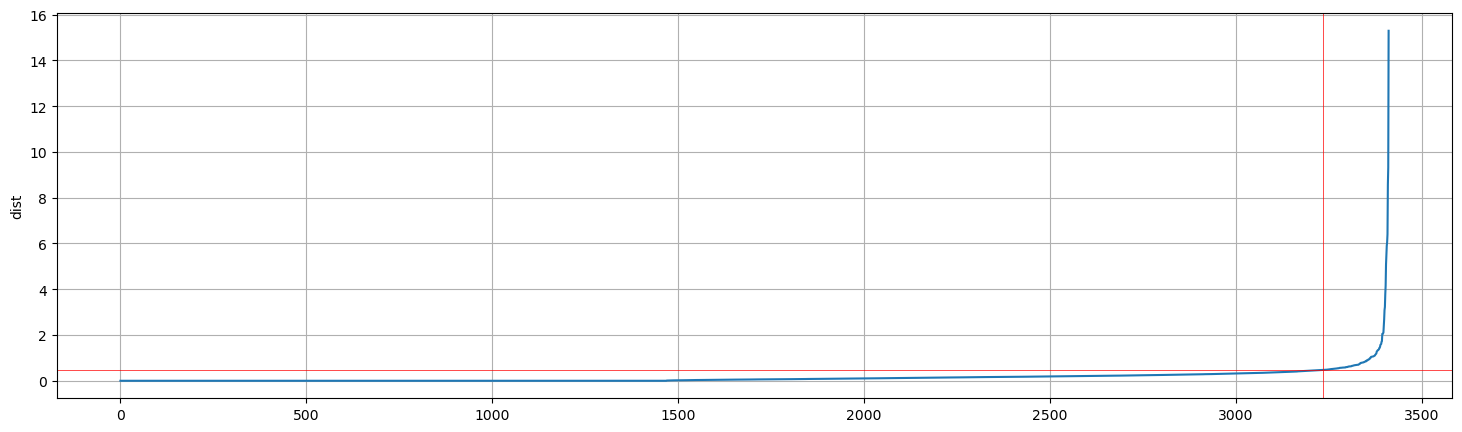

2025-01-28 11:11:44,155 - taxomizing_utils.py - root - do_dist_flattening - INFO - {'num_nodes': 3589, 'height': 15, 'num_root_children': 2, 'num_leaves': 3412, 'branching': 20.38, 'avg_degree': 1.0, 'avg_balance': 0.07, 'dia': 25, 'avg_depth': 7.38, 'width': 610}


{'num_nodes': 3589, 'height': 15, 'num_root_children': 2, 'num_leaves': 3412, 'branching': 20.38, 'avg_degree': 1.0, 'avg_balance': 0.07, 'dia': 25, 'avg_depth': 7.38, 'width': 610}


In [190]:
# DIST --> DDIST
tree=linkage_to_btree(linkage_matrix, chunks_df)
print(get_tree_info_dict(tree))

#threshold_dist, index = get_dist_kneepoint(tree,  include_leaves=False, plot=True)
threshold_dist, index = get_dist_std(tree, std_factor=1.0, include_leaves=False, plot=True)

tree=do_dist_flattening(tree, threshold_dist=threshold_dist)
print(get_tree_info_dict(tree))

In [9]:
get_tree_info_dict(tree)

{'num_nodes': 3448,
 'height': 6,
 'num_root_children': 2,
 'num_leaves': 3412,
 'branching': 98.43,
 'avg_degree': 1.0,
 'avg_balance': 0.0,
 'dia': 11,
 'avg_depth': 4.43,
 'width': 1725}

2025-01-28 11:11:44,771 - taxomizing_utils.py - root - get_ddist_std - INFO - threshold_ddist: 1.1608, threshold_index: 153/ 176


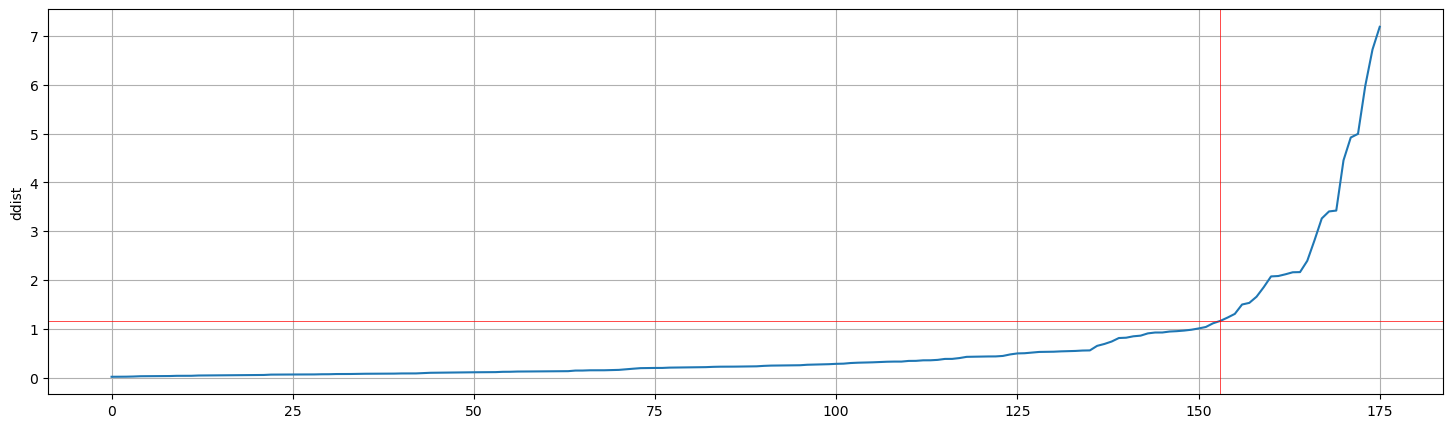

2025-01-28 11:11:45,262 - taxomizing_utils.py - root - do_ddist_flattening - INFO - {'num_nodes': 3445, 'height': 6, 'num_root_children': 2, 'num_leaves': 3412, 'branching': 107.56, 'avg_degree': 1.0, 'avg_balance': 0.0, 'dia': 11, 'avg_depth': 4.31, 'width': 1445}


{'num_nodes': 3445, 'height': 6, 'num_root_children': 2, 'num_leaves': 3412, 'branching': 107.56, 'avg_degree': 1.0, 'avg_balance': 0.0, 'dia': 11, 'avg_depth': 4.31, 'width': 1445}


In [191]:
#DDIST --> DIST
#tree=linkage_to_btree(linkage_matrix, chunks_df)
add_ddist(tree)

#threshold_ddist, index = get_ddist_kneepoint(tree, include_leaves=False, plot=True)
threshold_ddist, index = get_ddist_std(tree, std_factor=1.0, include_leaves=False, plot=True)

tree=do_ddist_flattening(tree, threshold_ddist=threshold_ddist)
print(get_tree_info_dict(tree))

2025-01-30 12:06:40,435 - taxomizing_utils.py - root - linkage_to_btree - INFO - {'num_nodes': 6823, 'height': 127, 'num_root_children': 2, 'num_leaves': 3412, 'branching': 2.0, 'avg_degree': 1.0, 'avg_balance': 4.32, 'dia': 236, 'avg_depth': 19.63, 'width': 656}
2025-01-30 12:06:40,580 - taxomizing_utils.py - root - get_dist_kneepoint - INFO - knee_dist: 1.0658, knee_index: 3369/ 3411


{'num_nodes': 6823, 'height': 127, 'num_root_children': 2, 'num_leaves': 3412, 'branching': 2.0, 'avg_degree': 1.0, 'avg_balance': 4.32, 'dia': 236, 'avg_depth': 19.63, 'width': 656}


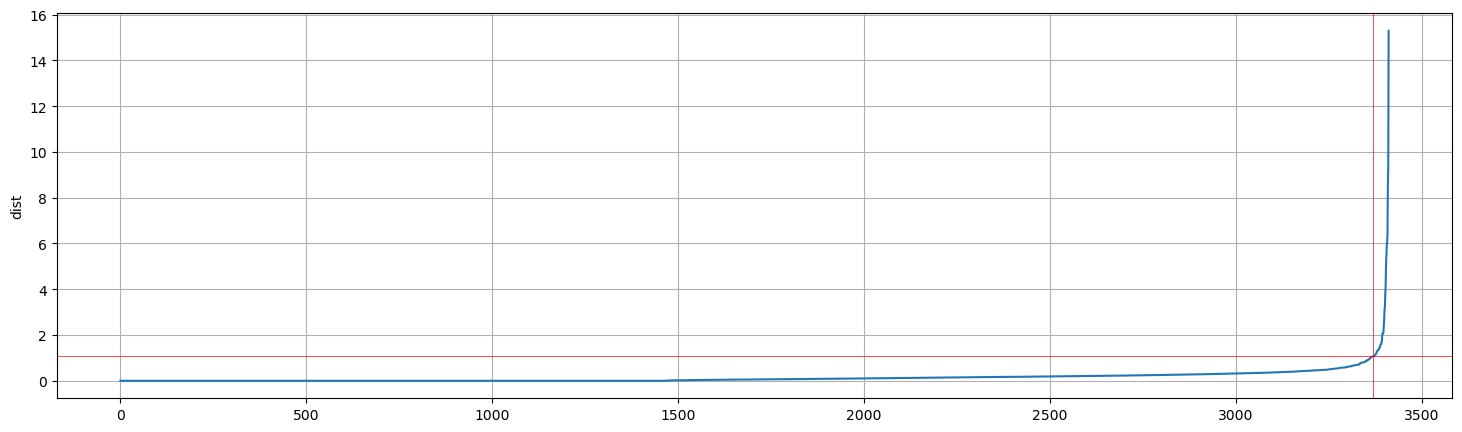

2025-01-30 12:06:41,119 - taxomizing_utils.py - root - do_dist_flattening - INFO - {'num_nodes': 3454, 'height': 9, 'num_root_children': 2, 'num_leaves': 3412, 'branching': 84.17, 'avg_degree': 1.0, 'avg_balance': 0.01, 'dia': 16, 'avg_depth': 5.24, 'width': 897}
2025-01-30 12:06:41,154 - taxomizing_utils.py - root - get_ddist_kneepoint - INFO - knee_ddist: 3.4228, knee_index: 35/ 41


{'num_nodes': 3454, 'height': 9, 'num_root_children': 2, 'num_leaves': 3412, 'branching': 84.17, 'avg_degree': 1.0, 'avg_balance': 0.01, 'dia': 16, 'avg_depth': 5.24, 'width': 897}


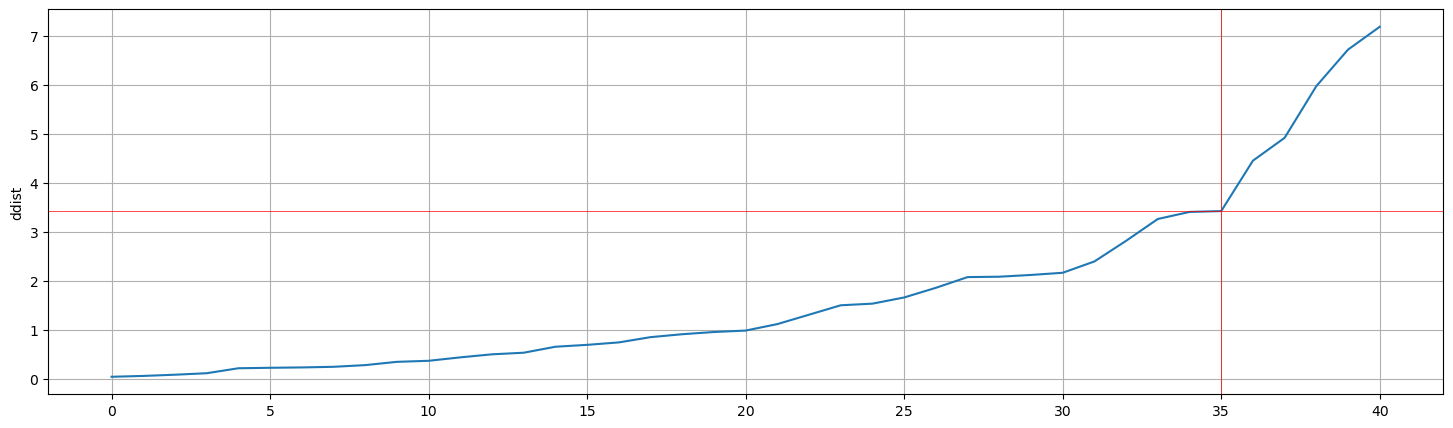

2025-01-30 12:06:41,733 - taxomizing_utils.py - root - do_ddist_flattening - INFO - {'num_nodes': 3427, 'height': 4, 'num_root_children': 2, 'num_leaves': 3412, 'branching': 244.57, 'avg_degree': 1.0, 'avg_balance': 0.0, 'dia': 7, 'avg_depth': 3.35, 'width': 2210}


{'num_nodes': 3427, 'height': 4, 'num_root_children': 2, 'num_leaves': 3412, 'branching': 244.57, 'avg_degree': 1.0, 'avg_balance': 0.0, 'dia': 7, 'avg_depth': 3.35, 'width': 2210}


In [13]:
# BOTH COMBINED
plot=True
tree=linkage_to_btree(linkage_matrix, chunks_df)
print(get_tree_info_dict(tree))

# vertical flattening
threshold_dist, index = get_dist_kneepoint(tree,  include_leaves=False, plot=plot)
#threshold_dist, index = get_dist_std(tree, std_factor=1.0, include_leaves=False, plot=plot)

tree=do_dist_flattening(tree, threshold_dist=threshold_dist)
print(get_tree_info_dict(tree))

#horizontal flattening
add_ddist(tree)

threshold_ddist, index = get_ddist_kneepoint(tree, include_leaves=False, plot=plot)
#threshold_ddist, index = get_ddist_std(tree, std_factor=1.0, include_leaves=False, plot=plot)
tree=do_ddist_flattening(tree, threshold_ddist=threshold_ddist)
print(get_tree_info_dict(tree))

In [14]:
tree=recover_leaf_parents(tree)
print(get_tree_info_dict(tree))

2025-01-30 12:06:47,538 - taxomizing_utils.py - root - recover_leaf_parents - INFO - {'num_nodes': 3429, 'height': 4, 'num_root_children': 2, 'num_leaves': 3412, 'branching': 214.12, 'avg_degree': 1.0, 'avg_balance': 0.0, 'dia': 7, 'avg_depth': 3.55, 'width': 1913}


{'num_nodes': 3429, 'height': 4, 'num_root_children': 2, 'num_leaves': 3412, 'branching': 214.12, 'avg_degree': 1.0, 'avg_balance': 0.0, 'dia': 7, 'avg_depth': 3.55, 'width': 1913}


In [9]:
reimport()

In [10]:
taxomizer=TaxomizingPipeline(llm_ref=llm_pipe)
taxomizer.get_config()

2025-01-31 08:13:53,184 - __init__.py - beesup_llm - __init__ - INFO - 0001_TAXOMIZING_PIPELINE initialised
2025-01-31 08:13:53,203 - __init__.py - beesup_llm - __init__ - INFO - 0001_LLM_PIPELINE initialised


{'type': 'taxomizing_pipeline',
 'id': 1,
 'name': '0001_taxomizing_pipeline',
 'dir_name': 'taxomizing_pipelines',
 'lab_name': 'injection_lab',
 'rel_path': 'injection_lab/taxomizing_pipelines/0001_taxomizing_pipeline',
 'dist_flattening_config': {'include_leaves': False,
  'use_kneepoint': True,
  'use_std': False,
  'std_factor': 1.0},
 'ddist_flattening_config': {'include_leaves': False,
  'use_kneepoint': True,
  'use_std': False,
  'std_factor': 1.0},
 'linkage_args': {'method': 'ward', 'optimal_ordering': False},
 'llm_config': {'type': 'llm_pipeline',
  'id': 1,
  'name': '0001_llm_pipeline',
  'dir_name': 'llm_pipelines',
  'lab_name': 'injection_lab',
  'rel_path': 'injection_lab/llm_pipelines/0001_llm_pipeline',
  'name_or_path': 'meta-llama/Meta-Llama-3.1-8B-Instruct',
  'pipeline_args': {'return_full_text': False,
   'clean_up_tokenization_spaces': True},
  'bnb_config': {'load_in_4bit': True,
   'bnb_4bit_use_double_quant': True,
   'bnb_4bit_quant_type': 'nf4'},
  'infe

In [11]:
taxomizer.spawn()

2025-01-31 08:13:58,320 - __init__.py - beesup_llm - spawn_config - INFO - 0001_TAXOMIZING_PIPELINE config spawned at injection_lab/taxomizing_pipelines/0001_taxomizing_pipeline


In [12]:
taxomizer.process(chunks_df, verbose=True)

2025-01-31 08:14:05,658 - taxomizing_utils.py - root - linkage_to_btree - INFO - {'num_nodes': 6823, 'height': 127, 'num_root_children': 2, 'num_leaves': 3412, 'branching': 2.0, 'avg_degree': 1.0, 'avg_balance': 4.32, 'dia': 236, 'avg_depth': 19.63, 'width': 656}
2025-01-31 08:14:05,819 - taxomizing_utils.py - root - get_dist_kneepoint - INFO - knee_dist: 1.0658, knee_index: 3369/ 3411
2025-01-31 08:14:06,375 - taxomizing_utils.py - root - do_dist_flattening - INFO - {'num_nodes': 3454, 'height': 9, 'num_root_children': 2, 'num_leaves': 3412, 'branching': 84.17, 'avg_degree': 1.0, 'avg_balance': 0.01, 'dia': 16, 'avg_depth': 5.24, 'width': 897}
2025-01-31 08:14:06,418 - taxomizing_utils.py - root - get_ddist_kneepoint - INFO - knee_ddist: 3.4228, knee_index: 35/ 41
2025-01-31 08:14:06,631 - taxomizing_utils.py - root - do_ddist_flattening - INFO - {'num_nodes': 3427, 'height': 4, 'num_root_children': 2, 'num_leaves': 3412, 'branching': 244.57, 'avg_degree': 1.0, 'avg_balance': 0.0, 'di

3412, 3413, 1/17                              
2/17                              8                    
3/17                              5                    
4/17                              1                    
5/17                              6                    
6/17                                                   
7/17                              3                    
8/17                              6                    
9/17                              9                    
10/17                                                
11/17                                                
12/17                                                 
13/17                                                
14/17                                                  
15/17                                                 
16/17                                                 


2025-01-31 08:14:46,173 - taxomizing_pipeline.py - beesup_llm - get_embedding_tree - INFO - all chunks included in the tree: True


[6822] Wildbienen7971622943878174                    
├──  [6820] Nist- und Bauverhalten der Wildbienen
│   ├──  [6796] Familien der Wildbienen
│   ├──  [6799] Pollensammelverhalten: Polylektizität und Oligolektizität
│   ├──  [6806] Nistplätze der Wildbienen
│   ├──  [6793] Sozialverhalten der Wildbienen
│   └──  [6807] Baumaterialien und Requisiten der Wildbienen
└──  [6821] Umgangssprachliche Bezeichnungen der Wildbienen
    ├──  [6817] Lebensweise und Merkmale
    │   ├──  [3412] Lebensweise und Nestbau


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


    │   ├──  [6798] Merkmale der Wildbienen
    │   ├──  [6797] Lebensraum und Vorkommen
    │   └──  [6801] Verbreitung und Lebensraum
    └──  [6818] Vorkommen und Umgangssprachliche Bezeichnungen der Dünen-Steppenbiene
        ├──  [3413] Umgangssprachliche Bezeichnungen der Wildbienen-Arten
        ├──  [6810] Kuckuckswespen
        └──  [6812] Wildbienenarten der Familie Apidae


In [34]:
isinstance(chunks_df,pd.DataFrame)

True

In [35]:
not tree

False

In [6]:
tree=taxomizer.get_flattened_tree(chunks_df=chunks_df)

2025-01-21 06:30:23,063 - taxomizing_utils.py - root - linkage_to_btree - INFO - {'num_nodes': 3885, 'height': 27, 'num_root_children': 2, 'num_leaves': 1943, 'branching': 2.0, 'avg_degree': 1.0, 'avg_balance': 0.61, 'dia': 46, 'avg_depth': 12.27, 'width': 524}
2025-01-21 06:30:23,074 - taxomizing_utils.py - root - get_dist_kneepoint - INFO - knee_dist: 1.0695, knee_index: 1911/ 1942
2025-01-21 06:30:23,489 - taxomizing_utils.py - root - do_dist_flattening - INFO - {'num_nodes': 1974, 'height': 8, 'num_root_children': 2, 'num_leaves': 1943, 'branching': 65.7, 'avg_degree': 1.0, 'avg_balance': 0.01, 'dia': 14, 'avg_depth': 4.57, 'width': 749}
2025-01-21 06:30:23,495 - taxomizing_utils.py - root - get_ddist_kneepoint - INFO - knee_ddist: 1.6568, knee_index: 21/ 30
2025-01-21 06:30:23,587 - taxomizing_utils.py - root - do_ddist_flattening - INFO - {'num_nodes': 1959, 'height': 5, 'num_root_children': 2, 'num_leaves': 1943, 'branching': 130.4, 'avg_degree': 1.0, 'avg_balance': 0.0, 'dia': 

In [193]:
with open("tree.pkl", "wb") as f:
    pickle.dump(tree, f)

In [183]:
from anytree import RenderTree
for pre, fill, node in RenderTree(tree):
    if node.is_leaf:
        print(f"{pre}[{node.name}] {getattr(node,'dist',0):.2f} {node.label}")
        continue

    #print(f"{pre}({node.name}) {getattr(node,'dist',0):.2f} {node.size-1} descendants/ {len(node.children)} children")

    children_is_leaf=[n.is_leaf for n in node.children]
    num_leaf_children=children_is_leaf.count(True)
    num_node_children=children_is_leaf.count(False)
    
    print(f"{pre}({node.name}) {getattr(node,'dist',0):.2f} {num_leaf_children} leaf_children/ {num_node_children} node_children")

(6822) 15.30 0 leaf_children/ 2 node_children
├── (6820) 8.57 0 leaf_children/ 2 node_children
│   ├── (6796) 1.38 476 leaf_children/ 0 node_children
│   │   ├── [2450] 0.00 Familie/ Melittidae
│   │   ├── [2458] 0.00 Familie/ Melittidae
│   │   ├── [2446] 0.00 Familie/ Melittidae
│   │   ├── [2430] 0.00 Familie/ Melittidae
│   │   ├── [2438] 0.00 Familie/ Melittidae
│   │   ├── [2237] 0.00 Familie/ Melittidae
│   │   ├── [2229] 0.00 Familie/ Melittidae
│   │   ├── [1363] 0.00 Familie/ Melittidae
│   │   ├── [1370] 0.00 Familie/ Melittidae
│   │   ├── [1037] 0.00 Familie/ Apidae
│   │   ├── [2419] 0.00 Familie/ Apidae
│   │   ├── [3402] 0.00 Familie/ Apidae
│   │   ├── [3387] 0.00 Familie/ Apidae
│   │   ├── [3376] 0.00 Familie/ Apidae
│   │   ├── [3372] 0.00 Familie/ Apidae
│   │   ├── [3368] 0.00 Familie/ Apidae
│   │   ├── [3364] 0.00 Familie/ Apidae
│   │   ├── [2890] 0.00 Familie/ Apidae
│   │   ├── [2868] 0.00 Familie/ Apidae
│   │   ├── [2883] 0.00 Familie/ Apidae
│   │   ├── [2

In [32]:
import pickle

In [8]:
with open("tree.pkl", "wb") as f:
    pickle.dump(tree, f)

## Multiway Tree via HDBScan

In [9]:
from sklearn.metrics.pairwise import pairwise_distances

distance_matrix = pairwise_distances(np.vstack(chunks_df['emb'].values))
distance_matrix = distance_matrix.astype(np.float64)
distance_matrix.shape

(1943, 1943)

In [49]:
import hdbscan

clusterer = hdbscan.HDBSCAN(
    min_cluster_size=5,
    min_samples=1,
    metric='precomputed',
    #cluster_selection_method='leaf',
    #allow_single_cluster=True,
    #cluster_selection_epsilon=1.0,
    #approx_min_span_tree=False,

    )
clusterer.fit(distance_matrix)

chunks_df['cid']=clusterer.labels_

In [50]:
chunks_df['cid'].value_counts()

cid
-1     582
 28    511
 19     90
 63     71
 60     60
      ... 
 13      5
 45      5
 11      5
 43      5
 30      5
Name: count, Length: 65, dtype: int64

In [51]:
entropy_data=[]

for node_id in chunks_df['cid'].unique():
    n_chunks=len(chunks_df[chunks_df.cid==node_id])

    entropy_row=dict(
        cid=node_id,
        n_chunks=n_chunks,
    )

    for col in ['subject','predicate','source_name','attr_type']:

        probabilities = chunks_df[chunks_df.cid==node_id][col].value_counts(normalize=True)
        entropy = -np.sum(probabilities * np.log2(probabilities))

        entropy_row[f"{col}"]=entropy
    
    entropy_data.append(entropy_row)

entropy_df=pd.DataFrame(entropy_data)
entropy_df

cid  n_chunks   subject  predicate  source_name  attr_type
0    -1       582  7.523477   4.554175     0.641982   0.641982
1     3         6  2.584963  -0.000000    -0.000000  -0.000000
2     0         7  2.807355  -0.000000    -0.000000  -0.000000
3    28       511  8.997179  -0.000000    -0.000000  -0.000000
4    27        14  3.807355  -0.000000    -0.000000  -0.000000
..  ...       ...       ...        ...          ...        ...
60   16         8  3.000000  -0.000000    -0.000000  -0.000000
61    6         5  2.321928  -0.000000    -0.000000  -0.000000
62   49         6  2.584963  -0.000000    -0.000000  -0.000000
63   10         8  3.000000  -0.000000    -0.000000  -0.000000
64   30         5  2.321928  -0.000000    -0.000000  -0.000000

[65 rows x 6 columns]

In [52]:
chunks_df[chunks_df.cid==14]

chunk  \
976   Hylaeus angustatus (Schenck, 1861)\nPollensamm...   
979   Hylaeus brevicornis (Nylander, 1852)\nPollensa...   
992   Hylaeus communis (Nylander, 1852)\nPollensamme...   
997   Hylaeus confusus (Nylander, 1852)\nPollensamme...   
1007  Hylaeus difformis (Eversmann, 1852)\nPollensam...   
1009  Hylaeus dilatatus (Kirby, 1802)\nPollensammelv...   
1012  Hylaeus gibbus (Saunders, 1850)\nPollensammelv...   
1050  Hylaeus pictipes (Nylander, 1852)\nPollensamme...   

                                   subject              predicate  \
976     Hylaeus angustatus (Schenck, 1861)  Pollensammelverhalten   
979   Hylaeus brevicornis (Nylander, 1852)  Pollensammelverhalten   
992      Hylaeus communis (Nylander, 1852)  Pollensammelverhalten   
997      Hylaeus confusus (Nylander, 1852)  Pollensammelverhalten   
1007   Hylaeus difformis (Eversmann, 1852)  Pollensammelverhalten   
1009       Hylaeus dilatatus (Kirby, 1802)  Pollensammelverhalten   
1012       Hylaeus gibbus (Saunders, 1850)  Pollensammelverhalten   
1050     Hylaeus pictipes (Nylander, 1852)  Pollensammelverhalten   

                          object          source_name  attr_type  n_units  \
976   polylektisch (14 Familien)  wildbienen-kataster  Attribute        1   
979    polylektisch (6 Familien)  wildbienen-kataster  Attribute        1   
992   polylektisch (16 Familien)  wildbienen-kataster  Attribute        1   
997    polylektisch (8 Familien)  wildbienen-kataster  Attribute        1   
1007  polylektisch (10 Familien)  wildbienen-kataster  Attribute        1   
1009  polylektisch (12 Familien)  wildbienen-kataster  Attribute        1   
1012  polylektisch (15 Familien)  wildbienen-kataster  Attribute        1   
1050  polylektisch (11 Familien)  wildbienen-kataster  Attribute        1   

      n_words                                              label  \
976         3  Pollensammelverhalten/ polylektisch (14 Familien)   
979         3   Pollensammelverhalten/ polylektisch (6 Familien)   
992         3  Pollensammelverhalten/ polylektisch (16 Familien)   
997         3   Pollensammelverhalten/ polylektisch (8 Familien)   
1007        3  Pollensammelverhalten/ polylektisch (10 Familien)   
1009        3  Pollensammelverhalten/ polylektisch (12 Familien)   
1012        3  Pollensammelverhalten/ polylektisch (15 Familien)   
1050        3  Pollensammelverhalten/ polylektisch (11 Familien)   

                                                    emb         k_idc  cid  
976   [-0.005145659, -0.01900424, 0.027753256, 0.004...  [1672, 1758]   14  
979   [-0.004349828, -0.021616453, 0.03312413, 0.007...        [1677]   14  
992   [-0.0044239783, -0.020216906, 0.023390999, 0.0...        [1695]   14  
997   [0.0028390032, -0.015784036, 0.02690513, 0.002...        [1703]   14  
1007  [-0.0039860015, -0.016831681, 0.02550781, -0.0...  [1719, 1800]   14  
1009  [-0.0019859758, -0.02071183, 0.025470369, 0.00...  [1723, 1777]   14  
1012  [-0.005135564, -0.022087412, 0.023655005, 0.00...  [1733, 1751]   14  
1050  [-0.00062628277, -0.016043538, 0.02261624, 0.0...        [1813]   14

In [8]:
taxomizer=HDBScanTaxomizingPipeline()
taxomizer.load_clusterer(
    min_cluster_size=2, #5
    min_samples=1, #None
    alpha=1.0, #1.0
    leaf_size=40, #40
    cluster_selection_epsilon=0.1, #0.0
    cluster_selection_method="eom", #eom, leaf
    allow_single_cluster=False, #False
    #metric='precomputed',
    #metric='euclidean',
    #gen_min_span_tree=True,
)

taxomizer.fit_chunks_df(chunks_df)

chunks_df['cid']=taxomizer.clusterer.labels_

nodes_df=taxomizer.nodes_df
member_df=taxomizer.member_df
member_tree=taxomizer.member_tree

print(f"root children: {len(member_tree.children)}")

# dendro_df=taxomizer.clusterer.single_linkage_tree_.to_pandas()
# dendro_df.rename(columns={'distance':'dist'},inplace=True)
# dendro_df['did']=dendro_df.index

2024-11-27 09:53:02,286 - __init__.py - beesup_llm - __init__ - INFO - 0001_TAXOMIZING initialised
2024-11-27 09:53:03,002 - __init__.py - beesup_llm - fit - INFO - number of clusters: 372
2024-11-27 09:53:03,004 - __init__.py - beesup_llm - fit - INFO - number of clustered: 1807
2024-11-27 09:53:03,005 - __init__.py - beesup_llm - fit - INFO - number of unclustered: 613
2024-11-27 09:53:04,635 - __init__.py - beesup_llm - fit_chunks_df - INFO - tree.height: 169
2024-11-27 09:53:05,730 - __init__.py - beesup_llm - fit_chunks_df - INFO - member_tree.size: 2894


root children: 2


In [77]:
from anytree import RenderTree
for pre, fill, node in RenderTree(member_tree):
    if node.is_leaf: continue
    print(f"{pre}{node.name} ... Node with {node.size-1} descdendants/ {len(node.children)} children")

3889 ... Node with 3501 descdendants/ 2 children
├── 3891 ... Node with 6 descdendants/ 6 children
└── 3890 ... Node with 3493 descdendants/ 2 children
    ├── 3893 ... Node with 222 descdendants/ 2 children
    │   ├── 3894 ... Node with 52 descdendants/ 4 children
    │   │   ├── 3898 ... Node with 12 descdendants/ 12 children
    │   │   └── 3899 ... Node with 36 descdendants/ 14 children
    │   │       ├── 3903 ... Node with 9 descdendants/ 9 children
    │   │       └── 3902 ... Node with 13 descdendants/ 2 children
    │   │           ├── 3904 ... Node with 5 descdendants/ 5 children
    │   │           └── 3905 ... Node with 6 descdendants/ 6 children
    │   └── 3895 ... Node with 168 descdendants/ 2 children
    │       ├── 3897 ... Node with 30 descdendants/ 13 children
    │       │   ├── 3901 ... Node with 5 descdendants/ 5 children
    │       │   └── 3900 ... Node with 12 descdendants/ 12 children
    │       └── 3896 ... Node with 136 descdendants/ 16 children
    │    

In [ ]:
plot_emb_clustering_scatter_3d(nodes_df[nodes_df.is_leaf])

In [10]:
linkage_df

left_child  right_child       dist    size
0         1045.0       1052.0   0.009568     2.0
1         1157.0       1617.0   0.009808     2.0
2         1524.0       1529.0   0.010272     2.0
3         1752.0       1824.0   0.011195     2.0
4         2230.0       2266.0   0.012130     2.0
...          ...          ...        ...     ...
2414      4820.0       4831.0   3.780880   459.0
2415      4832.0       4834.0   5.712151   856.0
2416      4817.0       4835.0   5.855102  1089.0
2417      4829.0       4833.0   7.240815  1331.0
2418      4836.0       4837.0  10.727504  2420.0

[2419 rows x 4 columns]

In [9]:
dendro_df=taxomizer.clusterer.single_linkage_tree_.to_pandas()
dendro_df.rename(columns={'distance':'dist'},inplace=True)
dendro_df

parent  left_child  right_child      dist    size
0       2420      1045.0       1052.0  0.009568     2.0
1       2421      1157.0       1617.0  0.009808     2.0
2       2422      1529.0       1524.0  0.010272     2.0
3       2423      1824.0       1752.0  0.011195     2.0
4       2424      2230.0       2266.0  0.012130     2.0
...      ...         ...          ...       ...     ...
2414    4834      4833.0       1209.0  0.367480  2416.0
2415    4835      4834.0       2194.0  0.370234  2417.0
2416    4836      4835.0        663.0  0.381080  2418.0
2417    4837      4836.0        318.0  0.391034  2419.0
2418    4838      4837.0       2193.0  0.395799  2420.0

[2419 rows x 5 columns]

In [ ]:
dendro_df=taxomizer.clusterer.single_linkage_tree_.to_pandas()
dendro_df.rename(columns={'distance':'dist'},inplace=True)

def dendro_df_to_anytree(dendro_df, chunks_df):
    dendro_df.sort_values(by='parent', ascending=False, inplace=True)

    nodes={}
    for _,row in dendro_df.iterrows():
        for child in ['left_child','right_child']:
            node_id=int(row[child])
            if node_id in nodes: continue

            nodes[node_id]=Node(node_id)
            nodes[node_id].__setattr__('dist',row.dist)

            if node_id not in chunks_df.index: continue

            for k,v in chunks_df.loc[node_id].items():
                if k in ['is_leaf','is_root','size','depth','height']: continue
                nodes[node_id].__setattr__(k,v)
            
    for _,row in dendro_df.iterrows():
            parent_id=int(row.parent)
            if parent_id not in nodes:
                 nodes[parent_id]=Node(parent_id)

            for child in ['left_child','right_child']:
                 node_id=int(row[child])
                 nodes[node_id].parent=nodes[parent_id]
               
    for node in nodes.values():
        if node.parent is None:  # Identify root nodes of disconnected components
            break
    
    return node



dendro_tree=dendro_df_to_anytree(dendro_df,chunks_df)
print(get_tree_info_dict(dendro_tree))
dendro_tree

{'num_nodes': 7777, 'num_leaves': 3889, 'mean_num_children': 2.0}


Node('/7776')

7777
i=3777 3777/3777	                         
4000


In [113]:
from anytree import RenderTree
for pre, fill, node in RenderTree(tax_tree):
    if node.is_leaf:
        print(f"{pre}{node.name} {node.label}")
        continue
    
    print(f"{pre}{node.name} ... Node with {node.size-1} descdendants/ {len(node.children)} children")

3889 ... Node with 2930 descdendants/ 2 children
├── 3891 ... Node with 204 descdendants/ 2 children
│   ├── 3892 ... Node with 48 descdendants/ 4 children
│   │   ├── 2272 Cluster with 1 members
│   │   ├── 2474 Cluster with 1 members
│   │   ├── 3896 ... Node with 12 descdendants/ 12 children
│   │   │   ├── 2214 Cluster with 1 members
│   │   │   ├── 2247 Cluster with 1 members
│   │   │   ├── 2265 Cluster with 1 members
│   │   │   ├── 2282 Cluster with 1 members
│   │   │   ├── 2347 Cluster with 1 members
│   │   │   ├── 2373 Cluster with 1 members
│   │   │   ├── 2380 Cluster with 1 members
│   │   │   ├── 2394 Cluster with 1 members
│   │   │   ├── 2467 Cluster with 1 members
│   │   │   ├── 2523 Cluster with 1 members
│   │   │   ├── 2530 Cluster with 1 members
│   │   │   └── 2537 Cluster with 1 members
│   │   └── 3897 ... Node with 32 descdendants/ 32 children
│   │       ├── 1894 Cluster with 1 members
│   │       ├── 1900 Cluster with 1 members
│   │       ├── 1906 Cluster

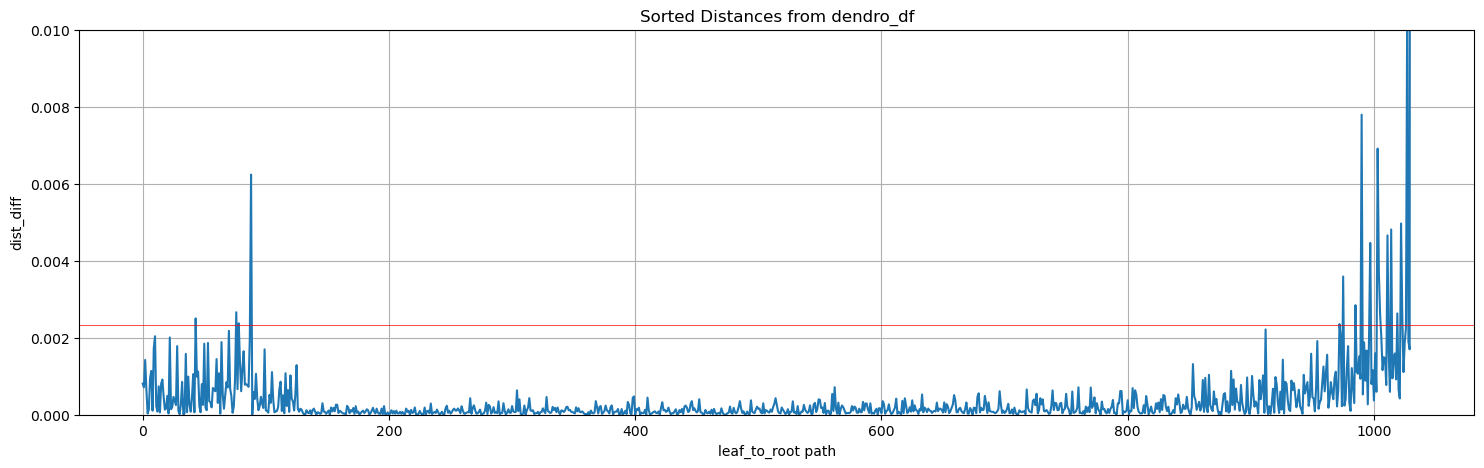

In [ ]:
import matplotlib.pyplot as plt

# Extract the 'dist' column and sort it
sorted_dist = path_df['dist_diff'].dropna()#.sort_values()

# Plot the sorted distances
plt.figure(figsize=(18, 5))
plt.plot(sorted_dist.values)
plt.axhline(y=path_df['dist_diff'].std(), color='red', linestyle='-', linewidth=0.5)
plt.xlabel('leaf_to_root path')
plt.ylabel('dist_diff')
plt.title('Sorted Distances from dendro_df')
plt.ylim(0, 0.01)  # Adjust the y-axis range
plt.grid(True)
plt.show()


In [154]:
data=[]
for cid, size in member_df.cid.value_counts().to_dict().items():

    predicates_str=''
    predicates=[]
    portions=[]
    
    for predicate, p in member_df[member_df.cid==cid]['predicate'].value_counts(normalize=True).to_dict().items():
        predicates_str+=f'{p:.2f}: {predicate}; '
        predicates.append(predicate)
        portions.append(p)

    row=dict(
        cid=cid,
        size=size,
        predicates_str=predicates_str,
        predicates=predicates,
        portions=portions,
    )

    data.append(row)

pd.DataFrame(data)

cid  size                                     predicates_str  \
0    5.0   127          0.72: Kuckucksbienen; 0.28: Wirtsbienen;    
1    4.0   126  0.40: Sozialverhalten; 0.32: Familie; 0.28: Vo...   
2    0.0   120  0.82: Familie; 0.17: Wissenschaftlicher Name; ...   
3   10.0   103                                  1.00: Nistweise;    
4    3.0   102  0.92: Umgangssprachliche Bezeichnungen; 0.05: ...   
5    7.0    96                      1.00: Pollensammelverhalten;    
6    1.0    81           1.00: Umgangssprachliche Bezeichnungen;    
7    2.0    66           0.91: Merkmale; 0.09: Kurzbeschreibung;    
8   11.0    62                                  1.00: Nistweise;    
9    8.0    62                      1.00: Pollensammelverhalten;    
10   9.0    59             0.98: Familie; 0.02: Sozialverhalten;    
11   6.0    35           1.00: Umgangssprachliche Bezeichnungen;    

                                           predicates  \
0                       [Kuckucksbienen, Wirtsbienen]   
1   [Sozialverhalten, Familie, Vorkommen und Leben...   
2   [Familie, Wissenschaftlicher Name, Umgangsspra...   
3                                         [Nistweise]   
4   [Umgangssprachliche Bezeichnungen, Merkmale, S...   
5                             [Pollensammelverhalten]   
6                  [Umgangssprachliche Bezeichnungen]   
7                        [Merkmale, Kurzbeschreibung]   
8                                         [Nistweise]   
9                             [Pollensammelverhalten]   
10                         [Familie, Sozialverhalten]   
11                 [Umgangssprachliche Bezeichnungen]   

                                             portions  
0           [0.7165354330708661, 0.28346456692913385]  
1   [0.40476190476190477, 0.31746031746031744, 0.2...  
2   [0.825, 0.16666666666666666, 0.008333333333333...  
3                                               [1.0]  
4   [0.9215686274509803, 0.049019607843137254, 0.0...  
5                                               [1.0]  
6                                               [1.0]  
7           [0.9090909090909091, 0.09090909090909091]  
8                                               [1.0]  
9                                               [1.0]  
10          [0.9830508474576272, 0.01694915254237288]  
11                                              [1.0]

In [101]:
from anytree import RenderTree
for pre, fill, node in RenderTree(taxomizer.member_tree):
    if node.is_leaf: continue
    print(f"{pre}{node.name} ... Node with {node.size-1} descdendants/ {len(node.children)} children")

3889 ... Node with 3074 descdendants/ 2 children
├── 3891 ... Node with 204 descdendants/ 2 children
│   ├── 3892 ... Node with 48 descdendants/ 4 children
│   │   ├── 3896 ... Node with 12 descdendants/ 12 children
│   │   └── 3897 ... Node with 32 descdendants/ 32 children
│   └── 3893 ... Node with 154 descdendants/ 2 children
│       ├── 3895 ... Node with 28 descdendants/ 28 children
│       └── 3894 ... Node with 124 descdendants/ 58 children
│           ├── 3901 ... Node with 14 descdendants/ 14 children
│           └── 3900 ... Node with 52 descdendants/ 52 children
└── 3890 ... Node with 2868 descdendants/ 2 children
    ├── 3899 ... Node with 21 descdendants/ 21 children
    └── 3898 ... Node with 2845 descdendants/ 2 children
        ├── 3903 ... Node with 349 descdendants/ 2 children
        │   ├── 3905 ... Node with 14 descdendants/ 14 children
        │   └── 3904 ... Node with 333 descdendants/ 2 children
        │       ├── 3907 ... Node with 12 descdendants/ 12 childr

In [108]:
from anytree import Node, RenderTree, PreOrderIter, findall
from anytree.exporter import DotExporter

def reduce_tree_depth(tree, max_depth):
    """
    Reduce the depth of an anytree tree by moving all descendant leaf nodes
    to the node at the specified max_depth and removing deeper branches.

    Args:
        tree (Node): The root of the tree.
        max_depth (int): The depth to cut off branches.

    Returns:
        Node: The modified tree root.
    """
    # Traverse the tree and find all nodes at the max depth
    nodes_at_max_depth = [node for node in PreOrderIter(tree) if (node.depth == max_depth) and (not node.is_leaf)]

    for node in nodes_at_max_depth:
        # Collect all descendant leaves of this node
        descendant_leaves = [leaf for leaf in PreOrderIter(node) if leaf.is_leaf]

        # Reassign all descendant leaves as direct children of this node
        for leaf in descendant_leaves:
            if leaf.parent != node:  # Ensure no self-parenting or redundant reassignment
                leaf.parent = node

        # Remove all previous children (now redundant) from this node
        for child in list(node.children):
            if child not in descendant_leaves:
                child.parent = None

    return tree

tax_tree=copy.deepcopy(taxomizer.member_tree)
tax_tree=reduce_tree_depth(copy.deepcopy(tax_tree), 4)

for node in PreOrderIter(tax_tree):
    if node.is_leaf: continue
    node.__delattr__('emb')

tax_tree=propagate_emb(tax_tree)
tax_tree

Node('/3889', cid=nan, decendant_cids={0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46}, dist=nan, emb=array([-0.00024735,  0.01230525,  0.03133485, ..., -0.01900094,
        0.00526422,  0.0116678 ], dtype=float32), id=3889, label='Cluster with 3075 members', lambda_val=nan, object=nan, parent_id=nan, predicate=nan, subject=nan)

In [109]:
from anytree import RenderTree
for pre, fill, node in RenderTree(tax_tree):
    if node.is_leaf: continue
    print(f"{pre}{node.name} ... Node with {node.size-1} descdendants/ {len(node.children)} children")

3889 ... Node with 2930 descdendants/ 2 children
├── 3891 ... Node with 204 descdendants/ 2 children
│   ├── 3892 ... Node with 48 descdendants/ 4 children
│   │   ├── 3896 ... Node with 12 descdendants/ 12 children
│   │   └── 3897 ... Node with 32 descdendants/ 32 children
│   └── 3893 ... Node with 154 descdendants/ 2 children
│       ├── 3895 ... Node with 28 descdendants/ 28 children
│       └── 3894 ... Node with 124 descdendants/ 58 children
│           ├── 3901 ... Node with 14 descdendants/ 14 children
│           └── 3900 ... Node with 52 descdendants/ 52 children
└── 3890 ... Node with 2724 descdendants/ 2 children
    ├── 3899 ... Node with 21 descdendants/ 21 children
    └── 3898 ... Node with 2701 descdendants/ 2 children
        ├── 3903 ... Node with 329 descdendants/ 2 children
        │   ├── 3905 ... Node with 14 descdendants/ 14 children
        │   └── 3904 ... Node with 313 descdendants/ 313 children
        └── 3902 ... Node with 2370 descdendants/ 2 children
  

# Generate Headers

- key der am nächsten am mean embedding ist?

In [3]:
reimport()

In [273]:
set_debug()

In [15]:
propagate_emb_from_leaves(tree)

In [194]:
with open("tree.pkl", "rb") as f: 
    tree = pickle.load(f)
    propagate_emb_from_leaves(tree)

def add_internal_labels(tree):

    for node in PreOrderIter(tree):
        if not node.is_leaf:
            children_is_leaf=[n.is_leaf for n in node.children]
            num_leafs=children_is_leaf.count(True)
            num_node_children=children_is_leaf.count(False)
            node.__setattr__('label',f"internal node ({len(node.children)}/ {len(node.leaves)})")

add_internal_labels(tree)

In [195]:
#GET plot_df

import seaborn as sns
def assign_colors_tree(tree):

    num_internal_nodes=len([node for node in PreOrderIter(tree) if not node.is_leaf])
    colors=sns.color_palette("husl", num_internal_nodes)

    for node in InOrderIter(tree):
        if node.is_leaf: continue

        color=colors.pop()
        node.__setattr__('color',color)

        if all([n.is_leaf for n in node.children]):
            for n in node.children:
                n.__setattr__('color',color)
    return   
assign_colors_tree(tree)

plot_data=[]

for node in PreOrderIter(tree):

    plot_row=dict(
        id=node.name,
        parent_id=node.parent.name if node.parent is not None else None,
        dist=getattr(node,'dist',0),
        label=node.label,
        emb=node.emb,
        parent_emb=node.parent.emb if node.parent is not None else node.emb,
        parent_dist=getattr(node.parent,'dist',node.dist),
        husl_color=node.color,
    )

    plot_data.append(plot_row)

plot_df=pd.DataFrame(plot_data)

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer, PowerTransformer

emb_matrix=np.vstack(plot_df['emb'].values)
pca=PCA(n_components=2)
pca.fit(emb_matrix)

pca_emb_matrix=pca.transform(emb_matrix)

#dist_scaler = MinMaxScaler(feature_range=(np.min(pca_emb_matrix), np.max(pca_emb_matrix)))
dist_scaler = StandardScaler()


scaler_dist_matrix = dist_scaler.fit_transform(np.vstack(plot_df['dist'].values))
plot_df['pca_coords']=list(np.concatenate([pca_emb_matrix, scaler_dist_matrix], axis=1))


parent_pca_emb_matrix=pca.transform(np.vstack(plot_df['parent_emb'].values))
parent_scaler_dist_matrix=dist_scaler.transform(np.vstack(plot_df['parent_dist'].values))
plot_df['parent_pca_coords']=list(np.concatenate([parent_pca_emb_matrix, parent_scaler_dist_matrix], axis=1))

plot_df.drop(columns=['emb','parent_emb','dist','parent_dist'],inplace=True)
plot_df.head(3)

id  parent_id                     label  \
0  6822        NaN   internal node (2/ 3412)   
1  6820     6822.0   internal node (2/ 1499)   
2  6796     6820.0  internal node (476/ 476)   

                                          husl_color  \
0  (0.22586548355134273, 0.6522878871081115, 0.84...   
1  (0.9648889414626248, 0.41896694790705413, 0.69...   
2  (0.9662991208372061, 0.4299506472785264, 0.622...   

                                          pca_coords  \
0  [0.0003367960453033447, -0.05217123031616211, ...   
1  [-0.29659008979797363, -0.10747865587472916, 2...   
2  [-0.3033186197280884, -0.4187542200088501, 3.2...   

                                   parent_pca_coords  
0  [0.0003367960453033447, -0.05217123031616211, ...  
1  [0.0003367960453033447, -0.05217123031616211, ...  
2  [-0.29659008979797363, -0.10747865587472916, 2...

In [196]:
# PLOT the tree
fig = go.Figure()

pca_coords=np.vstack(plot_df['pca_coords'].values)
parent_pca_coords=np.vstack(plot_df['parent_pca_coords'].values)
parent_traces = np.stack([pca_coords, parent_pca_coords], axis=1)  # Shape: (2445, 2, 3)

# Nodes
node_points=go.Scatter3d(
        x=pca_coords[:,0],
        y=pca_coords[:,1],
        z=pca_coords[:,2],
        mode='markers',  # 'markers' mode for points
        marker=dict(size=2, color=plot_df['husl_color']),  # Customize marker appearance
        name='nodes',  # Name for the legend
        #showlegend=True,
        #text=plot_df['label'].values,
        text=plot_df.apply(lambda x: f"{x.id} {x.label}", axis=1).values,
        hoverinfo='text'
        )
fig.add_trace(node_points)

for i in range(parent_traces.shape[0]):
    parent_trace=go.Scatter3d(
            x=parent_traces[i][:,0],
            y=parent_traces[i][:,1],
            z=parent_traces[i][:,2],
            mode='lines',  # 'markers' mode for points
            line=dict(width=1, color=2*[plot_df['husl_color'][i]]),  # Customize marker appearance
            name='parent_trace',  # Name for the legend
            text=None,
            hoverinfo='none',
            #legendgroup=
            #legendgroup='parent_traces',
            showlegend=False,
            #text=nodes_df['label'].values,
            #hoverinfo='text'
            )

    fig.add_trace(parent_trace)


fig.update_layout(GO_LAYOUT)
fig.show(renderer='vscode')

# fig.update_layout(height=None, width=None, margin=dict(l=0, r=0, t=0, b=0))
# fig.write_html("taxoplot.html", full_html=True)

In [393]:
fig.update_layout(height=None, width=None, margin=dict(l=0, r=0, t=0, b=0))
fig.write_html("taxoplot.html", full_html=True)

In [147]:
#def cluster_order(df)

import hdbscan
from sklearn.metrics.pairwise import pairwise_distances

df=exclude_chunks_df.copy()

distance_matrix = pairwise_distances(np.vstack(df['emb'].values))
distance_matrix = distance_matrix.astype(np.float64)

for min_samples in range(5,0,-1):

    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=5,
        min_samples=min_samples,
        metric='precomputed',
        cluster_selection_method='leaf',
        #allow_single_cluster=True,
        #cluster_selection_epsilon=1.0
        )
    df['cid']=clusterer.fit_predict(distance_matrix)

    if len(df[df.cid==-1]) < 0.5*len(df):
        print(min_samples)
        break


df['count'] = df['cid'].map(df['cid'].value_counts())
df=df.sort_values(by='count',ascending=False)

display(df.cid.value_counts())

df
#df['cid'].value_counts()


4


cid
-1    102
 4     79
 0     12
 3     12
 2     10
 5      9
 1      5
Name: count, dtype: int64

chunk  \
119   Andrena carantonica (Pérez, 1902)\nPollensamme...   
3408  Xylocopa violacea (Linnaeus, 1758)\nPollensamm...   
13    Amegilla quadrifasciata (de Villers, 1789)\nPo...   
3010  Osmia nigriventris (Zetterstedt, 1838)\nPollen...   
3030  Osmia pilicornis (Smith, 1846)\nPollensammelve...   
...                                                 ...   
1865  Hylaeus tyrolensis (Förster, 1871)\nPollensamm...   
1860  Hylaeus taeniolatus (Förster, 1871)\nPollensam...   
1850  Hylaeus sinuatus (Schenck, 1853)\nPollensammel...   
1682  Hylaeus clypearis (Schenck, 1853)\nPollensamme...   
1728  Hylaeus duckei (Alfken, 1904)\nPollensammelver...   

                                         subject              predicate  \
119            Andrena carantonica (Pérez, 1902)  Pollensammelverhalten   
3408          Xylocopa violacea (Linnaeus, 1758)  Pollensammelverhalten   
13    Amegilla quadrifasciata (de Villers, 1789)  Pollensammelverhalten   
3010      Osmia nigriventris (Zetterstedt, 1838)  Pollensammelverhalten   
3030              Osmia pilicornis (Smith, 1846)  Pollensammelverhalten   
...                                          ...                    ...   
1865          Hylaeus tyrolensis (Förster, 1871)  Pollensammelverhalten   
1860         Hylaeus taeniolatus (Förster, 1871)  Pollensammelverhalten   
1850            Hylaeus sinuatus (Schenck, 1853)  Pollensammelverhalten   
1682           Hylaeus clypearis (Schenck, 1853)  Pollensammelverhalten   
1728               Hylaeus duckei (Alfken, 1904)  Pollensammelverhalten   

                              object          source_name  attr_type  n_units  \
119                     polylektisch  wildbienen-kataster  Attribute        1   
3408                    polylektisch  wildbienen-kataster  Attribute        1   
13                      polylektisch  wildbienen-kataster  Attribute        1   
3010                    polylektisch  wildbienen-kataster  Attribute        1   
3030                    polylektisch  wildbienen-kataster  Attribute        1   
...                              ...                  ...        ...      ...   
1865  breit-oligolektisch (Apiaceae)  wildbienen-kataster  Attribute        1   
1860  breit-oligolektisch (Apiaceae)  wildbienen-kataster  Attribute        1   
1850  breit-oligolektisch (Apiaceae)  wildbienen-kataster  Attribute        1   
1682  breit-oligolektisch (Apiaceae)  wildbienen-kataster  Attribute        1   
1728  breit-oligolektisch (Apiaceae)  wildbienen-kataster  Attribute        1   

      n_words                                              label  \
119         1                Pollensammelverhalten/ polylektisch   
3408        1                Pollensammelverhalten/ polylektisch   
13          1                Pollensammelverhalten/ polylektisch   
3010        1                Pollensammelverhalten/ polylektisch   
3030        1                Pollensammelverhalten/ polylektisch   
...       ...                                                ...   
1865        2  Pollensammelverhalten/ breit-oligolektisch (Ap...   
1860        2  Pollensammelverhalten/ breit-oligolektisch (Ap...   
1850        2  Pollensammelverhalten/ breit-oligolektisch (Ap...   
1682        2  Pollensammelverhalten/ breit-oligolektisch (Ap...   
1728        2  Pollensammelverhalten/ breit-oligolektisch (Ap...   

                                                    emb   k_idc     score  \
119   [0.0017325822, -0.013345976, 0.028884202, 0.00...   [119]  0.885660   
3408  [0.001794284, -0.013420602, 0.028719211, 0.006...  [3408]  0.885571   
13    [0.0017725998, -0.013286201, 0.028865978, 0.00...    [13]  0.885450   
3010  [0.0016581153, -0.013310139, 0.02894973, 0.006...  [3010]  0.885939   
3030  [0.0016409467, -0.01344384, 0.028849004, 0.006...  [3030]  0.886003   
...                                                 ...     ...       ...   
1865  [-0.002280431, -0.015216886, 0.032048944, 0.00...  [1865]  0.840476   
1860  [-0.0023305789, -0.015258985

In [17]:
add_order_idc(tree, chunks_df, verbose=True)

1/17                              
2/17                              8                    
3/17                              5                    
4/17                              1                    
5/17                              6                    
6/17                                                   
7/17                              3                    
8/17                              6                    
9/17                              9                    
10/17                                                
11/17                                                
12/17                                                 
13/17                                                
14/17                                                  
15/17                                                 
16/17                                                 


In [204]:
chunk_embs=np.vstack(chunks_df['emb'].values)
header_embs=np.vstack([n.emb for n in PreOrderIter(tree) if not n.is_leaf])
match_matrix=cosine_similarity(header_embs,chunk_embs)

i=0
for node in PreOrderIter(tree):
    if node.is_leaf: continue

    node.__setattr__("include_chunk_idc",[])
    node.__setattr__("exclude_chunk_idc",[])

    if node.is_root: continue

    print(f"{i+1}/{header_embs.shape[0]}"+30*" ")

    include_chunk_mask=np.zeros(len(chunks_df), dtype=bool)
    include_chunk_mask[[n.name for n in node.leaves]]=True

    if node.siblings:
        exclude_chunk_mask = np.zeros(len(chunks_df), dtype=bool)
        exclude_chunk_mask[[n.name for s in node.siblings for n in s.leaves]] = True

    ranking_df=chunks_df.copy()
    ranking_df['score']=match_matrix[i]

    include_chunks_df=ranking_df[include_chunk_mask].copy()

    include_chunks_df=diverse_order(include_chunks_df, start_idx=include_chunks_df.score.argmax())
    #include_chunks_df=ranking_order(include_chunks_df)

    node.include_chunk_idc=include_chunks_df.index.to_list()
    #node.__setattr__("include_chunk_idc",include_chunks_df.index.to_list())

    if node.siblings:
        exclude_chunks_df=ranking_df[exclude_chunk_mask].copy()

        exclude_chunks_df=diverse_order(exclude_chunks_df, start_idx=exclude_chunks_df.score.argmax())
        #exclude_chunks_df=ranking_order(exclude_chunks_df)
        node.exclude_chunk_idc=exclude_chunks_df.index.to_list()
        #node.__setattr__("exclude_chunk_idc",exclude_chunks_df.index.to_list())

    i+=1
    
    #if i==6: break

1/36
2/36/1913	score: 0.6537980437278748                    
3/36/1023	score: 0.7334848046302795                    
4/36476	score: 0.9086104035377502                      
5/36687	score: 0.7901042103767395                    
6/36663	score: 0.7925707101821899                    
7/36113	score: 0.8707829713821411                    
8/36247	score: 0.996838390827179                     
9/36696	score: 0.7820659279823303                    
10/3629	score: 0.7896031141281128                    
11/3698	score: 0.9409681558609009                    
12/36	score: 0.8803589940071106                    
13/36	score: 0.8387869000434875                    
14/361499	score: 0.7007383704185486                    
15/361218	score: 0.7282794713973999                    
16/3658	score: 0.6681562662124634                    
17/3637	score: 0.8414962887763977                    
18/3663	score: 0.6873611807823181                    
19/3641	score: 0.6532225608825684                    
20/3612	score: 0.

In [205]:
with open("tree.pkl", "wb") as f:
    pickle.dump(tree, f)

In [9]:
with open("tree.pkl", "rb") as f: 
    tree = pickle.load(f)

In [110]:
tree.children[0].include_chunk_idc

[0,
 2008,
 1976,
 2006,
 1994,
 1953,
 2007,
 1977,
 1859,
 2002,
 1974,
 1998,
 1975,
 1981,
 2005,
 1939,
 1596,
 1989,
 1987,
 1730,
 2004,
 1857,
 1955,
 2003,
 1548,
 1764,
 1907,
 1909,
 1999,
 1971,
 1926,
 1995,
 1979,
 1766,
 1959,
 1984,
 1992,
 1537,
 2000,
 1910,
 1803,
 1391,
 1988,
 1913,
 2001,
 1878,
 1791,
 1603,
 1963,
 1993,
 1815,
 1937,
 1958,
 1948,
 1652,
 1954,
 1970,
 1915,
 1997,
 1911,
 1769,
 1813,
 1986,
 1432,
 1938,
 1649,
 1996,
 1978,
 1875,
 1229,
 1837,
 1746,
 1894,
 1830,
 1896,
 1991,
 1386,
 1985,
 1760,
 1908,
 1969,
 1899,
 1505,
 1450,
 1832,
 1990,
 1444,
 1932,
 1497,
 1962,
 1280,
 1931,
 1983,
 1526,
 1982,
 1460,
 1923,
 1581,
 1902,
 1964,
 1748,
 1798,
 1968,
 1738,
 1718,
 1951,
 1619,
 1789,
 1966,
 1819,
 1230,
 1843,
 1254,
 1947,
 1860,
 1643,
 1606,
 1824,
 1980,
 1602,
 1914,
 1367,
 1864,
 1498,
 1957,
 1822,
 1664,
 1618,
 1232,
 1868,
 1967,
 1778,
 1630,
 1325,
 1805,
 1924,
 1446,
 1669,
 1835,
 1872,
 1431,
 1753,
 1942,
 1

In [253]:
# CHECK if all chunks are included in the tree
chunks_df['node_id']=None

for node in PreOrderIter(tree):
    if node.is_leaf: continue
    if all([d.is_leaf for d in node.children]):
        chunks_df.loc[node.include_chunk_idc,'node_id']=node.name

chunks_df[chunks_df['node_id'].isna()]

Empty DataFrame
Columns: [chunk, subject, predicate, object, source_name, attr_type, n_units, n_words, label, emb, k_idc, node_id]
Index: []

In [202]:
entropy_data=[]

for node_id in chunks_df['node_id'].unique():
    n_chunks=len(chunks_df[chunks_df.node_id==node_id])

    entropy_row=dict(
        node_id=node_id,
        n_chunks=n_chunks,
    )

    for col in ['subject','predicate','source_name','attr_type']:

        probabilities = chunks_df[chunks_df.node_id==node_id][col].value_counts(normalize=True)
        entropy = -np.sum(probabilities * np.log2(probabilities))

        entropy_row[f"{col}"]=entropy
    
    entropy_data.append(entropy_row)

entropy_df=pd.DataFrame(entropy_data)
entropy_df

node_id  n_chunks   subject  predicate  source_name  attr_type
0      6798       237  7.871866   0.545682    -0.000000  -0.000000
1      6796       476  8.894818  -0.000000    -0.000000  -0.000000
2      6800       241  7.788408   0.591652     0.038807   0.038807
3      6803       195  6.874659   3.026456    -0.000000  -0.000000
4      6793       198  7.629357  -0.000000    -0.000000  -0.000000
5      6779       511  8.997179  -0.000000    -0.000000  -0.000000
6      6801       146  6.869586   2.538945    -0.000000  -0.000000
7      6787       118  6.882643  -0.000000    -0.000000  -0.000000
8      6780        88  6.459432  -0.000000    -0.000000  -0.000000
9      3412       247  7.948367  -0.000000    -0.000000  -0.000000
10     6799       336  8.392317  -0.000000    -0.000000  -0.000000
11     6797       117  6.870365   1.114587    -0.000000  -0.000000
12     3414        97  6.311253   1.135231    -0.000000  -0.000000
13     6731        16  4.000000   0.337290    -0.000000  -0.000000
14     6792        47  5.554589   3.031911    -0.000000  -0.000000
15     6735        24  4.584963  -0.000000    -0.000000  -0.000000
16     3413        64  6.000000  -0.000000    -0.000000  -0.000000
17     6702        14  3.521641   0.734530    -0.000000  -0.000000
18     6775        30  4.906891   1.032268    -0.000000  -0.000000
19     6760        65  6.022368  -0.000000    -0.000000  -0.000000
20     6733        12  3.584963   0.413817    -0.000000  -0.000000
21     6681         9  3.169925  -0.000000    -0.000000  -0.000000
22     6764       113  6.820179  -0.000000    -0.000000  -0.000000
23     6711        11  3.027169   0.865857    -0.000000  -0.000000

In [207]:
# TEST IF EXCLUDE and INCLUDE CHUNKS ARE DISJOINT
for node in PreOrderIter(tree):
    if node.is_leaf: continue
    
    include_chunk_idc=set(node.include_chunk_idc)
    exclude_chunk_idc=set(node.exclude_chunk_idc)

    intersection=include_chunk_idc.intersection(exclude_chunk_idc)
    if len(intersection)>0:
        print(f"Node {node.name} has overlapping include and exclude chunks: {intersection}")


In [208]:
def reset_headers(tree):
    for node in PreOrderIter(tree):
        if node.is_leaf: continue
        node.__setattr__('header',"<unknown section header>")
    tree.__setattr__('header', "Wildbienen")

def get_table_of_contents_until(the_node, tree, isolate_branch=False):
    table_of_contents=""
    the_ancestors=the_node.ancestors

    for pre, fill, node in RenderTree(tree):
        
        if (node.is_leaf) and (node.name != the_node.name) : continue
        if (node.is_leaf) and (node.name == the_node.name) : break
        if isolate_branch and (node not in the_ancestors): continue
    
        table_of_contents+=f"{pre}{node.header}\n"
        if node.name == the_node.name: break
        
    
    if isolate_branch:
        table_of_contents=table_of_contents.replace('├──','└──')
        table_of_contents=table_of_contents.replace('│',' ')
    
    return table_of_contents

def get_table_of_contents(tree):
    table_of_contents=""
    for pre, fill, node in RenderTree(tree):
        if node.is_leaf: continue
        table_of_contents+=f"{pre} {node.header}\n"
    return table_of_contents

def get_tree_until(the_node, tree):
    new_tree=copy.deepcopy(tree)
    do_detach=False
    for node in PreOrderIter(new_tree):

        if (node.name == the_node.name):
            do_detach=True
            continue

        if do_detach:
            node.parent=None
    
    return new_tree

def get_tree_branch_until(the_node, tree):
    new_tree=copy.deepcopy(tree)
    ancestor_ids=[n.name for n in the_node.ancestors]

    for node in PreOrderIter(new_tree):
        if node.name in ancestor_ids: continue
        if node.name == the_node.name: continue
        node.parent=None

    return new_tree

def get_headerpath_until(the_node, tree):
    ancestor_ids=[n.name for n in the_node.ancestors]
    headerpath=[]
    for node in PreOrderIter(tree):
        if node.name not in ancestor_ids: continue
        if node.is_leaf: continue
        headerpath.append(node.header)
    
    return headerpath

reset_headers(tree)

node=tree.leaves[34]

toc=get_table_of_contents(get_tree_until(node, tree))
print(toc)

 Wildbienen
└──  <unknown section header>
    └──  <unknown section header>



In [ ]:
# IDEEN
# - few-shots
# - bottom up --> post-order traversal

In [168]:
#Load Model
llm_pipe=LlamaPipeline()
model=llm_pipe.get_model()

2025-01-28 10:56:31,370 - __init__.py - beesup_llm - __init__ - INFO - 0001_LLM_PIPELINE initialised
2025-01-28 10:56:31,373 - __init__.py - beesup_llm - load_model - INFO - Loading model meta-llama/Meta-Llama-3.1-8B-Instruct
2025-01-28 10:56:32,524 - modeling.py - accelerate.utils.modeling - get_balanced_memory - INFO - We will use 90% of the memory on device 0 for storing the model, and 10% for the buffer to avoid OOM. You can set `max_memory` in to a higher value to use more memory (at your own risk).


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [169]:
#Load Model
llm_pipe=LlamaPipeline(model=model)
llm_pipe.prepare_inference()

2025-01-28 10:57:26,539 - __init__.py - beesup_llm - __init__ - INFO - 0001_LLM_PIPELINE initialised


## Generate Headers Top-Down

In [ ]:
reset_headers(tree)

In [394]:
for pre, fill, node in RenderTree(tree):
    if node.is_leaf: 
        print(f"{pre} [{node.name}] {node.label}")
        continue
    print(f"{pre} ({node.name}) {node.header.upper()}")

 (6822) WILDBIENEN
├──  (6820) NIST- UND BAUVERHALTEN DER WILDBIENEN
│   ├──  (6796) FAMILIEN DER WILDBIENEN
│   │   ├──  [2450] Familie/ Melittidae
│   │   ├──  [2458] Familie/ Melittidae
│   │   ├──  [2446] Familie/ Melittidae
│   │   ├──  [2430] Familie/ Melittidae
│   │   ├──  [2438] Familie/ Melittidae
│   │   ├──  [2237] Familie/ Melittidae
│   │   ├──  [2229] Familie/ Melittidae
│   │   ├──  [1363] Familie/ Melittidae
│   │   ├──  [1370] Familie/ Melittidae
│   │   ├──  [1037] Familie/ Apidae
│   │   ├──  [2419] Familie/ Apidae
│   │   ├──  [3402] Familie/ Apidae
│   │   ├──  [3387] Familie/ Apidae
│   │   ├──  [3376] Familie/ Apidae
│   │   ├──  [3372] Familie/ Apidae
│   │   ├──  [3368] Familie/ Apidae
│   │   ├──  [3364] Familie/ Apidae
│   │   ├──  [2890] Familie/ Apidae
│   │   ├──  [2868] Familie/ Apidae
│   │   ├──  [2883] Familie/ Apidae
│   │   ├──  [2861] Familie/ Apidae
│   │   ├──  [2854] Familie/ Apidae
│   │   ├──  [2840] Familie/ Apidae
│   │   ├──  [2847] Familie

In [213]:
#select a node for testing
for i,node in enumerate(PreOrderIter(tree)):
    if node.is_leaf: continue
    if i==1: break

chunks_df.loc[node.include_chunk_idc]

chunk  \
1     Aglaoapis tridentata (Nylander, 1848)\nFamilie...   
3354  Systropha planidens (Giraud, 1861)\nFamilie\nH...   
3344  Systropha curvicornis (Scopoli, 1770)\nFamilie...   
3298  Sphecodes spinulosus (Hagens, 1875)\nFamilie\n...   
3294  Sphecodes schenckii (Hagens, 1882)\nFamilie\nH...   
...                                                 ...   
1881  Lasioglossum albipes (Fabricius, 1781)\nSozial...   
2906  Osmia andrenoides (Spinola, 1808)\nBaumaterial...   
1767  Hylaeus leptocephalus (Morawitz, 1870)\nPollen...   
71    Andrena argentata (Smith, 1844)\nRequisiten\nSand   
3009  Osmia nigriventris (Zetterstedt, 1838)\nNistwe...   

                                     subject              predicate  \
1      Aglaoapis tridentata (Nylander, 1848)                Familie   
3354      Systropha planidens (Giraud, 1861)                Familie   
3344   Systropha curvicornis (Scopoli, 1770)                Familie   
3298     Sphecodes spinulosus (Hagens, 1875)                Familie   
3294      Sphecodes schenckii (Hagens, 1882)                Familie   
...                                      ...                    ...   
1881  Lasioglossum albipes (Fabricius, 1781)        Sozialverhalten   
2906       Osmia andrenoides (Spinola, 1808)            Baumaterial   
1767  Hylaeus leptocephalus (Morawitz, 1870)  Pollensammelverhalten   
71           Andrena argentata (Smith, 1844)             Requisiten   
3009  Osmia nigriventris (Zetterstedt, 1838)              Nistweise   

                                      object          source_name  attr_type  \
1                               Megachilidae  wildbienen-kataster  Attribute   
3354                              Halictidae  wildbienen-kataster  Attribute   
3344                              Halictidae  wildbienen-kataster  Attribute   
3298                              Halictidae  wildbienen-kataster  Attribute   
3294                              Halictidae  wildbienen-kataster  Attribute   
...                                      ...                  ...        ...   
1881                                  unklar  wildbienen-kataster  Attribute   
2906                         Pflanzenmörtel?  wildbienen-kataster  Attribute   
1767  polylektisch (starke Präf.  Melilotus)  wildbienen-kataster  Attribute   
71                                      Sand  wildbienen-kataster  Attribute   
3009  hypergäisch-selbstgegrabene Hohlräume?  wildbienen-kataster  Attribute   

      n_units  n_words                                              label  \
1           1        1                              Familie/ Megachilidae   
3354        1        1                                Familie/ Halictidae   
3344        1        1                                Familie/ Halictidae   
3298        1        1                                Familie/ Halictidae   
3294        1        1                                Familie/ Halictidae   
...       ...      ...                                                ...   
1881        1        1                            Sozialverhalten/ unklar   
2906        1        2                       Baumaterial/ Pflanzenmörtel?   
1767        1        5  Pollensammelverhalten/ polylektisch (starke Pr...   
71          1        1                                   Requisiten/ Sand   
3009        1        3  Nistweise/ hypergäisch-selbstgegrabene Hohlräume?   

                                                    emb  \
1     [-0.008217988, -0.017626682, 0.014735313, 0.00...   
3354  [-0.017203335, -0.008402897, 0.015091043, 0.00...   
3344  [-0.017203335, -0.008402897, 0.015091043, 0.00...   
3298  [-0.017203335, -0.008402897, 0.015091043, 0.00...   
3294  [-0.017203335, -0.008402897, 0.015091043, 0.00...   
...                                                 ...   
1881  [0.00023760012, 0.009935445, 0.030456364, 0.01...   
2906  [-0.0039657094, -0.005921601, 0.020055266, -0....   
1767  [-0.0017625653, -0.018867759, 0.027744014, -0....   
71    [0.006

### Include - Exclude Prompting

In [221]:
from anytree.iterators import PreOrderIter

#select a node for testing
for i,node in enumerate(PreOrderIter(tree)):
    if node.is_leaf: continue
    if i==1: break

def get_chunk_text(chunk_row):
    #chunk_template="{subject}\t{predicate}\t{object}"
    chunk_template="{predicate}: {object}"

    chunk_text=chunk_template.format(**chunk_row)
    chunk_text=re.sub(r'\n+', '; ', chunk_text)

    return chunk_text

def get_header_prompt(node, tree, chunks_df):
    
    headerpath=" > ".join(get_headerpath_until(node, tree))+" > here"

    prompt=""
    prompt+=f"""
Actually we are inside a section belonging to table of contents. Our header path up to here is: {headerpath}

Your task now is to make up a concise meaningful header for the section we are currently in.
""".strip()
    prompt+="\n\n"
    prompt+=f"""
GIVEN:
- samples of content that is explicitly included in the section we are currently in
- samples of content that is explicitly excluded from the section we are in because it belongs to sibling sections

TASK:
- carefully read the given samples and understand what topic areas are included, and what are excluded
- what makes the difference between the included and excluded content?
- make up a precise meaningful title that best describes the essence of the included content against the excluded content
- don't explain your solution, just answer with a precise meaningful title
""".strip()
    
    prompt+=f"\n\n\nINCLUDED CHUNKS (focus of the current section):\n"
    included_chunks_df=chunks_df.loc[node.include_chunk_idc].copy()
    included_chunks_df['chunk_text']=included_chunks_df.apply(get_chunk_text, axis=1)
    included_chunks_df=included_chunks_df.drop_duplicates(subset='chunk_text')

    chars, max_chars =0, 10000
    for i,chunk_row in included_chunks_df.iterrows():
        line=chunk_row.chunk_text+' | '
        prompt+=line
        chars+=len(line)
        if chars>max_chars: break


    prompt+=f"\n\n\nEXCLUDED CHUNKS (sibling sections to distinguish scope):\n"
    excluded_chunks_df=chunks_df.loc[node.exclude_chunk_idc].copy()
    excluded_chunks_df['chunk_text']=excluded_chunks_df.apply(get_chunk_text, axis=1)
    excluded_chunks_df=excluded_chunks_df.drop_duplicates(subset='chunk_text')

    chars, max_chars= 0, 10000
    for i,chunk_row in excluded_chunks_df.iterrows():
        line=chunk_row.chunk_text+' | '
        prompt+=line
        chars+=len(line)
        if chars>max_chars: break

    # prompt+="\n\nCONTEXT:\n"
    # md_headers=mardownify_headerpath(get_headerpath_until(node, tree))
    # prompt+=md_headers

    prompt+="\n\n\nCONCISE MEANINGFUL TITLE:\n"

    return prompt
    
prompt=get_header_prompt(node,tree,chunks_df)
print(prompt)

Actually we are inside a section belonging to table of contents. Our header path up to here is: Wildbienen > here

Your task now is to make up a concise meaningful header for the section we are currently in.

GIVEN:
- samples of content that is explicitly included in the section we are currently in
- samples of content that is explicitly excluded from the section we are in because it belongs to sibling sections

TASK:
- carefully read the given samples and understand what topic areas are included, and what are excluded
- what makes the difference between the included and excluded content?
- make up a precise meaningful title that best describes the essence of the included content against the excluded content
- don't explain your solution, just answer with a precise meaningful title


INCLUDED CHUNKS (focus of the current section):
Familie: Megachilidae | Familie: Halictidae | Pollensammelverhalten: polylektisch | Pollensammelverhalten: - | Familie: Apidae | Nistweise: endogäisch-selbst

In [222]:
header=llm_pipe(prompt,use_chatformat=True, stop_strings=['\n'], max_new_tokens=100)[0]['generated_text']
print(header)

Nist- und Bauverhalten der Wildbienen


In [396]:
def clean_header(header):
    header=header.strip()
    header=header.replace('"','')
    header=header.replace('#','')
    return header

reset_headers(tree)
print(f"[{tree.name}] {tree.header}")
for pre,fill,node in RenderTree(tree):
    if node.is_leaf: continue
    if node.is_root: continue
    prompt=get_header_prompt(node,tree,chunks_df)
    header=llm_pipe(prompt,use_chatformat=True, stop_strings=['\n'], max_new_tokens=100)[0]['generated_text']
    header=clean_header(header)
    node.__setattr__('header',header)

    print(f"{pre} [{node.name}] {node.header}")

[6822] Wildbienen
├──  [6820] Nist- und Bauverhalten der Wildbienen
│   ├──  [6796] Familien der Wildbienen
│   └──  [6819] Nist- und Bauverhalten der Wildbienen: hypergäische Nistweisen
│       ├──  [6799] Pollensammelverhalten: Polylektizität und Oligolektizität
│       ├──  [6806] Nistweisen der Wildbienen: hypergäische Nistorte
│       │   ├──  [3412] Nistweisen der Wildbienen: endogäische Nistorte
│       │   └──  [6764] hypergäische Nistweisen: verschiedene Nistorte
│       └──  [6814] Baumaterialien und Requisiten der Wildbienen
│           ├──  [6793] Sozialverhalten der Wildbienen
│           └──  [6807] Baumaterialien und Requisiten der Wildbienen: natürliche Ressourcen
│               ├──  [3413] Baumaterialien und Requisiten der Wildbienen: natürliche Fels- und Steinressourcen
│               └──  [6760] Baumaterialien der Wildbienen: natürliche Materialien
└──  [6821] Umgangssprachliche Bezeichnungen für Wildbienen-Arten
    ├──  [6817] Merkmale der Wildbienen-Arten
    │ 

In [395]:
chunks_df.emb.values[0].shape

(4096,)

In [225]:
with open("tree.pkl", "wb") as f:
    pickle.dump(tree, f)

chunks_df.to_pickle("chunks_df.pkl")

### Playground

In [ ]:
def get_chunk_text(chunk_row):

    #chunk_template="{subject}\t{predicate}\t{object}"
    chunk_template="{predicate}\t{object}"

    chunk_text=chunk_template.format(**chunk_row)
    chunk_text=re.sub(r'\n+', '; ', chunk_text)

    return chunk_text

def get_summary_prompt(node, tree, chunks_df):

    prompt=""
    prompt+="""
GIVEN:
- samples of content that is explicitly excluded
- samples of content that is explicitly included

TASK:
- carefully read the given samples and understand what topic areas are included, and what are excluded
- what makes the difference between the included and excluded content?
- only focus on the content
- give a precise meaningful summary about the included content in constrast to the excluded content
""".strip()
    
    use_cols=['subject','predicate','object']
    included_chunks=chunks_df.iloc[node.include_chunk_idc][use_cols].to_dict(orient='records')
    excluded_chunks=chunks_df.iloc[node.exclude_chunk_idc][use_cols].to_dict(orient='records')

    prompt+="\n\n### INCLUDED CHUNKS (focus of the section):\n\n"
    chars, max_chars =0, 10000
    for chunk in included_chunks:
        line=get_chunk_text(chunk)+'\n'
        prompt+=line
        chars+=len(line)
        if chars>max_chars: break


    prompt+="\n\n### EXCLUDED CHUNKS (to distinguish scope):\n\n"
    chars, max_chars= 0, 10000
    for chunk in excluded_chunks:
        line=get_chunk_text(chunk)+'\n'
        prompt+=line
        chars+=len(line)
        if chars>max_chars: break


    # prompt+="\n\n### HIGHER-LEVEL CONTEXT:\n"
    # prompt+=" > ".join(get_headerpath_until(node, tree))
    # prompt+="\n\n"
    
    prompt+="\nSUMMARY OF INCLUDED CHUNKS:\n"
    return prompt

prompt=get_summary_prompt(node, tree, chunks_df)
print(prompt)

GIVEN:
- samples of content that is explicitly excluded
- samples of content that is explicitly included

TASK:
- carefully read the given samples and understand what topic areas are included, and what are excluded
- what makes the difference between the included and excluded content?
- only focus on the content
- give a precise meaningful summary about the included content in constrast to the excluded content

### INCLUDED CHUNKS (focus of the section):

Umgangssprachliche Bezeichnungen	Schwarze Mörtelbiene
Systematik	A. curvungula zählt zur Untergattung Lepidandrena, zu der in Mitteleuropa auch A. pandellei, A. rufizona und A. paucisquama gehören. Insgesamt sind 16 Arten dieser Untergattung bekannt, die in der Paläarktis verbreitet ist.
Requisiten	Sand
Synonyme	Osmia papaveris; Apis papaveris Latreille, 1799
Gefährdung	Die Berglandhummel gilt in Deutschland aufgrund von intensiver Land- und Forstwirtschaft sowie durch den Einsatz von Pestiziden als potentiell gefährdet.
Parasiten	Die

In [24]:
summary=llm_pipe(prompt,use_chatformat=True, stream=True)


**SUMMARY OF INCLUDED CHUNKS:**

Die inkludierte Inhalte beschäftigen sich mit verschiedenen Arten von Bienen und Wildbienen, die in Europa vorkommen. Die Arten sind:

1. **Lasioglossum laticeps**: Eine in Europa weit verbreitete Biene, die in verschiedenen Lebensräumen vorkommt.
2. **Sphecodes pellucidus**: Eine Biene, die in Sandgebieten und anderen Lebensräumen vorkommt.
3. **Megachile analis**: Eine Biene, die in verschiedenen Lebensräumen vorkommt und verschiedene Unterarten hat.
4. **Bombus alpinus**: Eine Biene, die in den Alpen vorkommt und in verschiedenen Höhenstufen anzutreffen ist.
5. **Osmia cornuta**: Eine Wildbienenart, die in Süd- und Mitteleuropa vorkommt und leicht gefördert werden kann.
6. **Rophites quinquespinosus**: Eine Biene, die in trockenwärmen Ruderalstellen und spät gemähten Wiesen vorkommt.
7. **Bombus pomorum**: Eine Biene, die in Europa vorkommt und stark gefährdet ist.
8. **Epeolus variegatus**: Eine Biene, die in Süd-, Mittel- und südlichen Nordeuropa v

In [ ]:
def get_header_prompt(summary):
    prompt+=""
    prompt+="""
GIVEN:
- a summary of the included content in a section

TASK:
- carefully read the given summary and understand the included content
- make up a precise meaningful title that best describes the essence of the included content
- don't explain your solution, just answer with a precise meaningful title
""".strip()
    
    prompt+="\n\nSUMMARY:\n"
    


    return prompt
    

In [64]:
FEWSHOTS=[
    dict(
        title="Technische Daten",
        context=["Automobil","Personenkraftwagen"],
        included=[
            dict(
                subject="VW Golf IV",
                predicate="max. Leistung",
                object="55 kW (75 PS) bei 5000/min"
            ),
            dict(
                subject="Fiat Multipla",
                predicate="Gemischaufbereitung",
                object="Saugrohreinspritzung"
            ),
            dict(
                subject="Audi A4 B9",
                predicate="Höchstgeschwindigkeit",
                object="250 km/h"
            )   
        ],
        excluded=[
            dict(
                subject="VW Golf",
                predicate="Allgemeines",
                object="Mit über 35 Millionen Exemplaren[1] ist der Golf eines der meistgebauten Autos der Welt."
            ),
            dict(
                subject="Fiat Multipla",
                predicate="Merkmale",
                object="Als besonderes Merkmal hatte der Multipla eine abgesetzte Leiste direkt unter der Frontscheibe. In diese Leiste waren die Scheinwerfer für das Fernlicht sowie mittig das Fiat-Logo mit fünf Strichen eingebaut."
            ),
            dict(
                subject="Audi A4 B9",
                predicate="Bauzeit",
                object="A4 Limousine und Kombi: August 2015 bis Juli 2024; S4 Limousine und Kombi: November 2016 bis Juni 2018, Mai 2019 bis Februar 2023"
            )
            ] 
    ),
    dict(
        title="Anwendung",
        context=["Stahl", "Einsatzstahl"],

        included=[
            dict(
                subject="17Cr3",
                predicate="Verwendung",
                object="Legierter Einsatzstahl für Teile mit überwiegender Verschleißbeanspruchung, Buchsen, Getrieberäder, Ritzel, Spindeln, Nockenwellen, Zahnräder"
            ),
            dict(
                subject="20MnCrS5",
                predicate="Anwendung",
                object="überwiegend für Bauteile im Maschinen- und Fahrzeugbau, wie z. B. Getriebeteile, Kolbenbolzen, Nockenwellen, Zahnräder oder Hebel"
            ),
            dict(
                subject="18CrNiMo7-6",
                predicate="Legierung 1.6587 – Einsatzstahl",
                object="Mit seiner Kernfestigkeit von bis zu 1350 N/mm² eignet er sich besonders für Bauteile, die höchsten Belastungen standhalten müssen. Das trifft beispielsweise auf Getriebeteile wie Tellerräder oder Antriebsritzel und auch für Zahnräder zu."
            )   
        ],
        excluded=[
            dict(
                subject="20NiCrMoS2-2",
                predicate="Mechanische Eigenschaften",
                object="behandelt auf Scherbarkeit, +S; weichgeglüht, +A"
            ),
            dict(
                subject="18CrNiMo7-6",
                predicate="Eigenschaften",
                object="Große Kernfestigkeit und Härte; Hohe Zähigkeit; Gute Zerspanbarkeit; Polierbar"
            ),
            dict(
                subject="18CrNiMo7-6",
                predicate="Chemische Zusammensetzung",
                object="C 0,15 – 0,21 / Si = 0,4 / Mn 0,5 – 0,9 / P = 0,025 / S = 0,035 / Cr 1,5 – 1,8 / Mo 0,25 – 0,35 / Ni 1,4 – 1,7"
            )
            ] 
    ),
]

def get_chunk_text(chunk_row):

    #chunk_template="{subject}\t{predicate}\t{object}"
    chunk_template="{predicate}\t{object}"

    chunk_text=chunk_template.format(**chunk_row)
    chunk_text=re.sub(r'\n+', '; ', chunk_text)

    return chunk_text

def get_prompt_messages(node, tree, chunks_df):
    prompt_messages=[]

    prompt_instruction=""
    prompt_instruction+="""
GIVEN:
- samples of content that is explicitly excluded
- samples of content that is explicitly included
- a higher-level context under which both the included and excluded content is subsumed

TASK:
- carefully read the given samples and understand what topic areas are included, and what are excluded
- what makes the difference between the included and excluded content?
- make up a precise meaningful title that best describes the essence of the included content against the excluded content
- don't explain your solution, just answer with a precise meaningful title
""".strip()

    prompt_messages.append({'role':'user','content':prompt_instruction})
    prompt_messages.append({'role':'assistant','content':"Ok, let's start!"})

    INCLUDE_PREFIX="### INCLUDED CHUNKS (focus of the section):\n"
    EXCLUDE_PREFIX="### EXCLUDED CHUNKS (to distinguish scope):\n"
    CONTEXT_PREFIX="### HIGHER LEVEL CONTEXT:\n"

    for fewshot in FEWSHOTS:

        prompt_details=""
        prompt_details+=INCLUDE_PREFIX
        for chunk_row in fewshot['included']:
            prompt_details+=f"{get_chunk_text(chunk_row)}\n\n"
        
        prompt_details+=EXCLUDE_PREFIX
        for chunk_row in fewshot['excluded']:
            prompt_details+=f"{get_chunk_text(chunk_row)}\n\n"
        
        prompt_details+=CONTEXT_PREFIX
        prompt_details+=" > ".join(fewshot['context'])

        prompt_messages.append({'role':'user','content':prompt_details})
        prompt_messages.append({'role':'assistant','content':fewshot['title']})


    prompt_details=""
    prompt_details+=INCLUDE_PREFIX
    chars, max_chars =0, 10000
    for chunk in chunks_df.iloc[node.include_chunk_idc].to_dict(orient='records'):
        line=get_chunk_text(chunk)+'\n\n'
        prompt_details+=line
        chars+=len(line)
        if chars>max_chars: break

    #prompt_details+='\n'

    prompt_details+=EXCLUDE_PREFIX
    chars, max_chars= 0, 10000
    for chunk in chunks_df.iloc[node.exclude_chunk_idc].to_dict(orient='records'):
        line=get_chunk_text(chunk)+'\n\n'
        prompt_details+=line
        chars+=len(line)
        if chars>max_chars: break
    
    prompt_details+=CONTEXT_PREFIX
    prompt_details+=" > ".join(get_headerpath_until(node, tree))

    prompt_messages.append({'role':'user','content':prompt_details})
    
    return prompt_messages

from anytree.iterators import PreOrderIter
i=0
for node in PreOrderIter(tree):
    if node.is_leaf: continue
    i+=1

    if i==2: break

prompt_messages=get_prompt_messages(node, tree, chunks_df)
prompt_messages

[{'role': 'user',
  'content': "GIVEN:\n- samples of content that is explicitly excluded\n- samples of content that is explicitly included\n- a higher-level context under which both the included and excluded content is subsumed\n\nTASK:\n- carefully read the given samples and understand what topic areas are included, and what are excluded\n- what makes the difference between the included and excluded content?\n- make up a precise meaningful title that best describes the essence of the included content against the excluded content\n- don't explain your solution, just answer with a precise meaningful title"},
 {'role': 'assistant', 'content': "Ok, let's start!"},
 {'role': 'user',
  'content': '### INCLUDED CHUNKS (focus of the section):\nmax. Leistung\t55 kW (75 PS) bei 5000/min\n\nGemischaufbereitung\tSaugrohreinspritzung\n\nHöchstgeschwindigkeit\t250 km/h\n\n### EXCLUDED CHUNKS (to distinguish scope):\nAllgemeines\tMit über 35 Millionen Exemplaren[1] ist der Golf eines der meistgebaut

In [62]:
header=llm_pipe(prompt_messages,use_chatformat=True, stop_strings=['\n'])[0]['generated_text']
print(header)

Spezielle Wildbienen


In [63]:
reset_headers(tree)
print(f"[{tree.name}] {tree.header}")
for pre,fill,node in RenderTree(tree):
    if node.is_leaf: continue
    if node.is_root: continue
    prompt_messages=get_prompt_messages(node,tree,chunks_df)
    header=llm_pipe(prompt_messages,use_chatformat=True, stop_strings=['\n'])[0]['generated_text']
    node.__setattr__('header',header)

    print(f"{pre} [{node.name}] {node.header}")

[3884] Wildbienen
├──  [3882] Spezielle Wildbienen
│   ├──  [3866] Wildbienen-Spezies
│   └──  [3880] Seidenbienen
│       ├──  [3869] Lebensweise von Seidenbienen
│       ├──  [3865] Kuckucksbienen
│       └──  [3867] Wildbienen
└──  [3883] Bienen
    ├──  [3879] Umgangssprachliche Bezeichnungen
    │   ├──  [1943] Umgangssprachliche Bezeichnungen
    │   └──  [3872] Nistorte
    └──  [3881] Wildbienen
        ├──  [3876] Kuckucksbienen
        │   ├──  [3859] Wirtsbienen
        │   └──  [3863] Kuckucksbienen
        └──  [3878] Bienen
            ├──  [1944] Wildbienen
            └──  [3862] Wildbienen


In [ ]:


def get_prompt(node, tree, chunks_df):

    prompt=""
    prompt+="You are tasked with generating a meaningful, concise title for a section in a document"
    prompt+="The title should reflect the key focus of the section, based on included content, while distinguishing it from excluded content."
    prompt+="Carefully read the given chunks and understand which are included, and which are excluded. "
    prompt+="Don't explain your solution, just answer with a meaningful section title."

    use_cols=['subject','predicate','object']
    included_chunks=chunks_df.iloc[node.include_chunk_idc][use_cols].to_dict(orient='records')
    excluded_chunks=chunks_df.iloc[node.exclude_chunk_idc][use_cols].to_dict(orient='records')

    prompt+="\n\n### INCLUDED CHUNKS (focus of the section):\n\n"
    chars, max_chars =0, 10000
    for chunk in included_chunks:
        line=get_chunk_text(chunk)+'\n\n'
        prompt+=line
        chars+=len(line)
        if chars>max_chars: break


    prompt+="\n\n### EXCLUDED CHUNKS (to distinguish scope):\n\n"
    chars, max_chars= 0, 10000
    for chunk in excluded_chunks:
        line=get_chunk_text(chunk)+'\n\n'
        prompt+=line
        chars+=len(line)
        if chars>max_chars: break


    # prompt+="\n\n### ANCESTOR CONTEXT:\n"
    # prompt+=" > ".join(get_headerpath_until(node, tree))
    # prompt+="\n\n"
    
    prompt+="\n\nGenerate a concise and meaningful section title that captures the essence of the included information. "
    prompt+="\nTITLE:\n"
    
    
    return prompt

from anytree.iterators import PreOrderIter
i=0
for node in PreOrderIter(tree):
    if node.is_leaf: continue
    i+=1

    if i==2: break

prompt=get_prompt(node,tree,chunks_df)
print(prompt)

You are tasked with generating a meaningful, concise title for a section in a document about wildbees. The title should reflect the key focus of the section, based on included content, while distinguishing it from excluded content.Carefully read the given chunks and understand which are included, and which are excluded. Don't explain your solution, just answer with a meaningful section title.

### INCLUDED CHUNKS (focus of the section):

Merkmale	Die Bienen haben eine Körperlänge von 8 bis 10 Millimetern (Weibchen) bzw. 7 bis 9 Millimetern (Männchen). Der Kopf und Thorax ist bei den Weibchen schwarz und ist wenig rot gezeichnet. Die Tergite sind rot und teilweise schwarz gezeichnet. Das oben flache Labrum ist schwarz und glänzt basal schwarz. Sein Vorderrand ist zu einer Spitze aufgewölbt. Das dritte Fühlerglied ist etwas länger als das vierte. Das oben flache Schildchen (Scutellum) ist schwarz. Die Schienen (Tibien) der Hinterbeine haben am Ende mehrere unregelmäßig angeordnete, dicht

# Prepare Finetuning

In [3]:
#Load Model
llm_pipe=LlamaPipeline()
llm_pipe.prepare_inference()

2025-01-31 08:07:53,369 - __init__.py - beesup_llm - __init__ - INFO - 0001_LLM_PIPELINE initialised
2025-01-31 08:07:53,373 - __init__.py - beesup_llm - load_model - INFO - Loading model meta-llama/Meta-Llama-3.1-8B-Instruct
2025-01-31 08:07:54,604 - modeling.py - accelerate.utils.modeling - get_balanced_memory - INFO - We will use 90% of the memory on device 0 for storing the model, and 10% for the buffer to avoid OOM. You can set `max_memory` in to a higher value to use more memory (at your own risk).


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [4]:
with open("tree.pkl", "rb") as f: 
    tree = pickle.load(f)

for node in PreOrderIter(tree):
    if not hasattr(node,'is_chunk'):
        if node.is_leaf: node.__setattr__('is_chunk',True)
        else: node.__setattr__('is_chunk',False)
        print(node.name, end=', ')

chunks_df=pd.read_pickle("chunks_df.pkl")

3412, 3413, 3414, 

In [5]:
for pre, fill, node in RenderTree(tree):
    if node.is_leaf: 
        print(f"{pre} [{node.name}] {node.label}")
        continue
    print(f"{pre} ({node.name}) {node.header.upper()}")

 (6822) WILDBIENEN
├──  (6820) NIST- UND BAUVERHALTEN DER WILDBIENEN
│   ├──  (6796) FAMILIEN DER WILDBIENEN
│   │   ├──  [2450] Familie/ Melittidae
│   │   ├──  [2458] Familie/ Melittidae
│   │   ├──  [2446] Familie/ Melittidae
│   │   ├──  [2430] Familie/ Melittidae
│   │   ├──  [2438] Familie/ Melittidae
│   │   ├──  [2237] Familie/ Melittidae
│   │   ├──  [2229] Familie/ Melittidae
│   │   ├──  [1363] Familie/ Melittidae
│   │   ├──  [1370] Familie/ Melittidae
│   │   ├──  [1037] Familie/ Apidae
│   │   ├──  [2419] Familie/ Apidae
│   │   ├──  [3402] Familie/ Apidae
│   │   ├──  [3387] Familie/ Apidae
│   │   ├──  [3376] Familie/ Apidae
│   │   ├──  [3372] Familie/ Apidae
│   │   ├──  [3368] Familie/ Apidae
│   │   ├──  [3364] Familie/ Apidae
│   │   ├──  [2890] Familie/ Apidae
│   │   ├──  [2868] Familie/ Apidae
│   │   ├──  [2883] Familie/ Apidae
│   │   ├──  [2861] Familie/ Apidae
│   │   ├──  [2854] Familie/ Apidae
│   │   ├──  [2840] Familie/ Apidae
│   │   ├──  [2847] Familie

## Instruction Finetuning

- also consider finetuning not in chat-format
- multiple queries in one conversation (alternating masking required)
- 

In [29]:
reimport()

In [30]:
tax_pipe=TaxomizingPipeline(1)
tax_pipe.get_config()
tree=tax_pipe.header_tree
chunks_df=tax_pipe.chunks_df

2025-01-31 09:42:19,334 - __init__.py - beesup_llm - __init__ - INFO - 0001_TAXOMIZING_PIPELINE initialised


 Wildbienen
└──  Nist- und Bauverhalten der Wildbienen
    └──  Familien der Wildbienen


Was weißt du über die Eigenschaft 'Familie' von Andrena bimaculata (Kirby, 1802)? Antworte mit einem Wort!

Andrenidae


Andrenidae<|eot_id|>

In [ ]:
# choose samples for testing!
# build training & test pipeline!
